**Mushroom Classification - EDA HW 1**

This is a dataset of different types of mushrooms and their features. Based on those features we can classify if the mushroom is edible or poisonous. The data set consists of 22 features (independent variables), 1 dependent variable and 8124 observations. The dependent variable has categorical charater value - 'p'(poisonous) and 'e' (edible); hence, this is a classification problem. And since the number of classes is two, it is a binary-class classification.



Upasana Mehta - um2024 - um2024@nyu.edu

In [56]:
install.packages("tidyverse")
# A collection of R packages designed for data science
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
# Reading the Mushroom csv file
df = read.csv('mushroom.csv',header=T, stringsAsFactors=F)

In [58]:
head(df)

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.attachment,gill.spacing,gill.size,gill.color,⋯,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,veil.type,veil.color,ring.number,ring.type,spore.print.color,population,habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,p,x,s,n,t,p,f,c,n,k,⋯,s,w,w,p,w,o,p,k,s,u
2,e,x,s,y,t,a,f,c,b,k,⋯,s,w,w,p,w,o,p,n,n,g
3,e,b,s,w,t,l,f,c,b,n,⋯,s,w,w,p,w,o,p,n,n,m
4,p,x,y,w,t,p,f,c,n,n,⋯,s,w,w,p,w,o,p,k,s,u
5,e,x,s,g,f,n,f,w,b,k,⋯,s,w,w,p,w,o,e,n,a,g
6,e,x,y,y,t,a,f,c,b,n,⋯,s,w,w,p,w,o,p,k,n,g


In [59]:
names(df)

[1] "class"                    "cap.shape"               
 [3] "cap.surface"              "cap.color"               
 [5] "bruises"                  "odor"                    
 [7] "gill.attachment"          "gill.spacing"            
 [9] "gill.size"                "gill.color"              
[11] "stalk.shape"              "stalk.root"              
[13] "stalk.surface.above.ring" "stalk.surface.below.ring"
[15] "stalk.color.above.ring"   "stalk.color.below.ring"  
[17] "veil.type"                "veil.color"              
[19] "ring.number"              "ring.type"               
[21] "spore.print.color"        "population"              
[23] "habitat"

In [61]:
glimpse(df)

Rows: 8,124
Columns: 23
$ class                    <chr> "p", "e", "e", "p", "e", "e", "e", "e", "p", …
$ cap.shape                <chr> "x", "x", "b", "x", "x", "x", "b", "b", "x", …
$ cap.surface              <chr> "s", "s", "s", "y", "s", "y", "s", "y", "y", …
$ cap.color                <chr> "n", "y", "w", "w", "g", "y", "w", "w", "w", …
$ bruises                  <chr> "t", "t", "t", "t", "f", "t", "t", "t", "t", …
$ odor                     <chr> "p", "a", "l", "p", "n", "a", "a", "l", "p", …
$ gill.attachment          <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f", …
$ gill.spacing             <chr> "c", "c", "c", "c", "w", "c", "c", "c", "c", …
$ gill.size                <chr> "n", "b", "b", "n", "b", "b", "b", "b", "n", …
$ gill.color               <chr> "k", "k", "n", "n", "k", "n", "g", "n", "p", …
$ stalk.shape              <chr> "e", "e", "e", "e", "t", "e", "e", "e", "e", …
$ stalk.root               <chr> "e", "c", "c", "e", "e", "c", "c", "c", "e", …
$ stalk.surface.

The dimensions of the data frame was found to be 8124×23, which corresponds to 8123 rows(number of observations) and 23 columns (number of variables). The number of columns includes the 22 features plus 1 column for the class variable. We can also see that the first column is the class variable, and its name is "class".

In [62]:
df2<-df

In [ ]:
# We will classify mushroom's class, i.e. if it's edible or poisonous based on 
# it's texture, colour, shape, veil type, rings, etc.

In [63]:
which(names(df)=='class')


[1] 1

In [64]:
class = table(df$class)
names(class)

[1] "e" "p"

In [65]:
class


   e    p 
4208 3916 

In [ ]:
# Now we know that the target variable is a categorical variable with character datatype, now we must clean the dataset
# by removing faulty datatypes + String Inconsistencies

In [66]:
#No faulty datatypes found, all are consistent except class attribute, since
#it is our categorical variable, we must make it a factor type variable.
df$class = as.factor(df$class)

In [67]:
glimpse(df)

Rows: 8,124
Columns: 23
$ class                    <fct> p, e, e, p, e, e, e, e, p, e, e, e, e, p, e, …
$ cap.shape                <chr> "x", "x", "b", "x", "x", "x", "b", "b", "x", …
$ cap.surface              <chr> "s", "s", "s", "y", "s", "y", "s", "y", "y", …
$ cap.color                <chr> "n", "y", "w", "w", "g", "y", "w", "w", "w", …
$ bruises                  <chr> "t", "t", "t", "t", "f", "t", "t", "t", "t", …
$ odor                     <chr> "p", "a", "l", "p", "n", "a", "a", "l", "p", …
$ gill.attachment          <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f", …
$ gill.spacing             <chr> "c", "c", "c", "c", "w", "c", "c", "c", "c", …
$ gill.size                <chr> "n", "b", "b", "n", "b", "b", "b", "b", "n", …
$ gill.color               <chr> "k", "k", "n", "n", "k", "n", "g", "n", "p", …
$ stalk.shape              <chr> "e", "e", "e", "e", "t", "e", "e", "e", "e", …
$ stalk.root               <chr> "e", "c", "c", "e", "e", "c", "c", "c", "e", …
$ stalk.surface.

In [68]:
df2<-df
dim(df)
#The rows and attributes

[1] 8124   23

In [69]:
#Checking how many values are missing
colSums(is.na(df))

class                cap.shape              cap.surface 
                       0                        0                        0 
               cap.color                  bruises                     odor 
                       0                        0                        0 
         gill.attachment             gill.spacing                gill.size 
                       0                        0                        0 
              gill.color              stalk.shape               stalk.root 
                       0                        0                        0 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                       0                        0                        0 
  stalk.color.below.ring                veil.type               veil.color 
                       0                        0                        0 
             ring.number                ring.type        spore.print.color 
                       0                        0                        0 
              population                  habitat 
                       0                        0

In [14]:
#Some Values have "?" like 12th column ( Looked it up in Excel )
#We will deal with it when it's needed. # We have already saved the df in df2

In [70]:
length(class)

[1] 2

In [71]:
print(ifelse(length(class)==2, "This is a Binary Calssification Problem","This is a Multiclass Classification Problem"))

[1] "This is a Binary Calssification Problem"


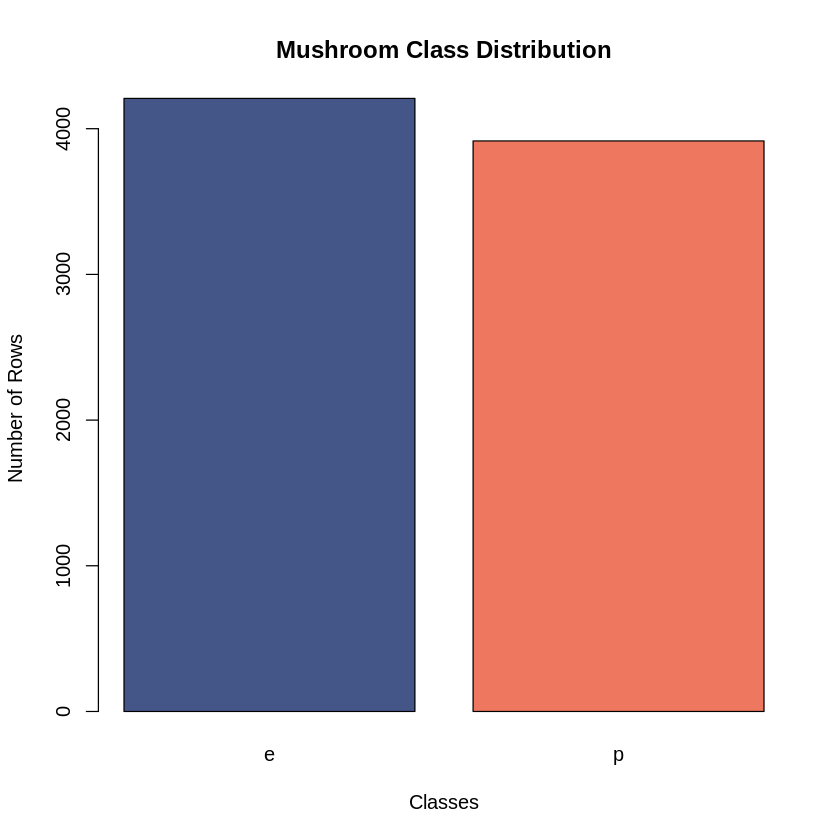

In [72]:
barplot(class, xlab="Classes",ylab="Number of Rows", col=c('#445588', '#ee7760') , main="Mushroom Class Distribution")

In [18]:
#Both Edible and Poisonous Classes are looking  almost 50/50 split

In [73]:
if(any(class<(nrow(df)*1/2*2/3) | any(class>(nrow(df)*1/2*3/2))))
    {
    imbalanced_classes = names(class)[class<(nrow(df)*1/2*2/3) | class>(nrow(df)*1/2*3/2)]
    print("Imbalanced Classes: ")
    print(imbalanced_classes)
    } else print("Dataset is Balanced")

[1] "Dataset is Balanced"


In [20]:
#Now that we know that the classes are balanced, there is no fear of class
#imbalance. Hence we will just look at the behaviour of other attributes on graphs
#to check if they are highly varying.

In [74]:
install.packages("viridis")
library(viridis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [75]:
glimpse(df)

Rows: 8,124
Columns: 23
$ class                    <fct> p, e, e, p, e, e, e, e, p, e, e, e, e, p, e, …
$ cap.shape                <chr> "x", "x", "b", "x", "x", "x", "b", "b", "x", …
$ cap.surface              <chr> "s", "s", "s", "y", "s", "y", "s", "y", "y", …
$ cap.color                <chr> "n", "y", "w", "w", "g", "y", "w", "w", "w", …
$ bruises                  <chr> "t", "t", "t", "t", "f", "t", "t", "t", "t", …
$ odor                     <chr> "p", "a", "l", "p", "n", "a", "a", "l", "p", …
$ gill.attachment          <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f", …
$ gill.spacing             <chr> "c", "c", "c", "c", "w", "c", "c", "c", "c", …
$ gill.size                <chr> "n", "b", "b", "n", "b", "b", "b", "b", "n", …
$ gill.color               <chr> "k", "k", "n", "n", "k", "n", "g", "n", "p", …
$ stalk.shape              <chr> "e", "e", "e", "e", "t", "e", "e", "e", "e", …
$ stalk.root               <chr> "e", "c", "c", "e", "e", "c", "c", "c", "e", …
$ stalk.surface.

In [76]:
capshape = table(df$cap.shape)

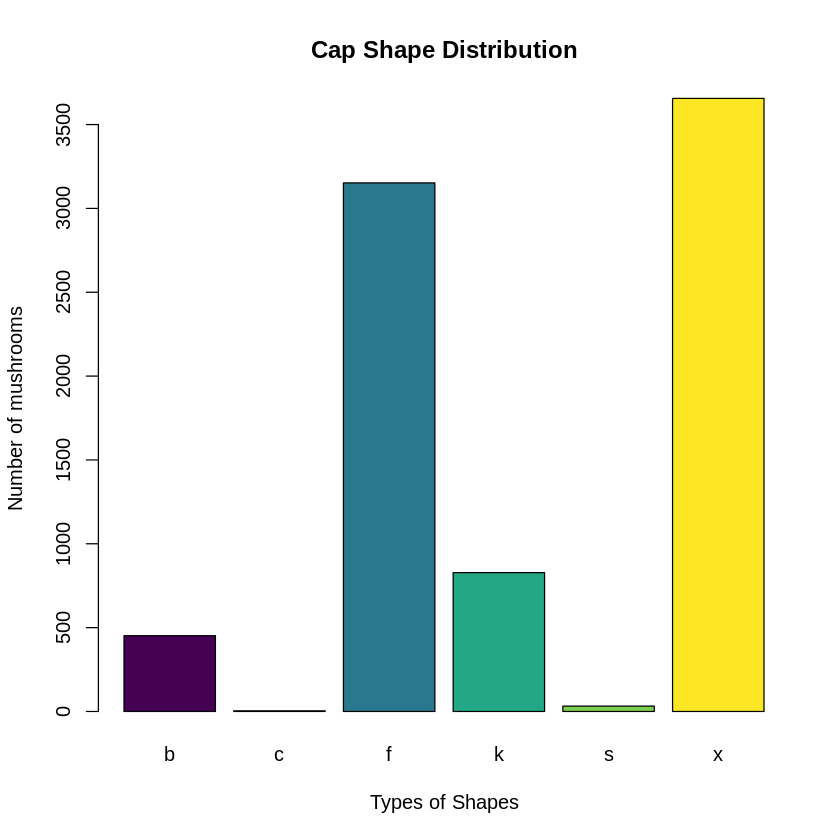

In [77]:
barplot(capshape, xlab="Types of Shapes",ylab="Number of mushrooms",col=viridis(6), main="Cap Shape Distribution")

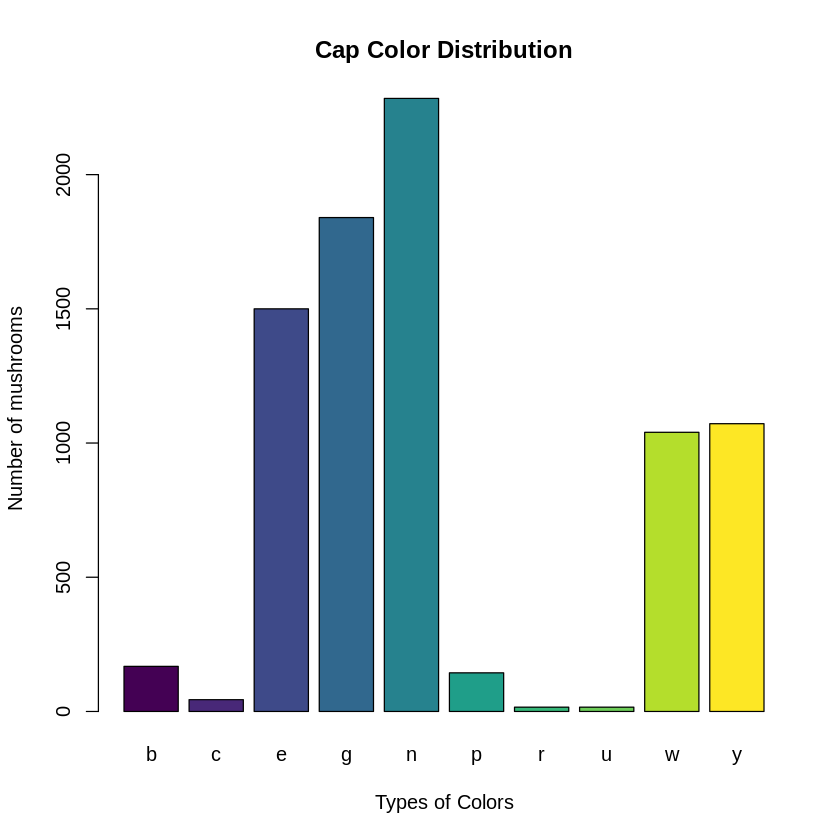

In [78]:
capcolor = table(df$cap.color)
barplot(capcolor, xlab="Types of Colors",ylab="Number of mushrooms",col=viridis(10), main="Cap Color Distribution")

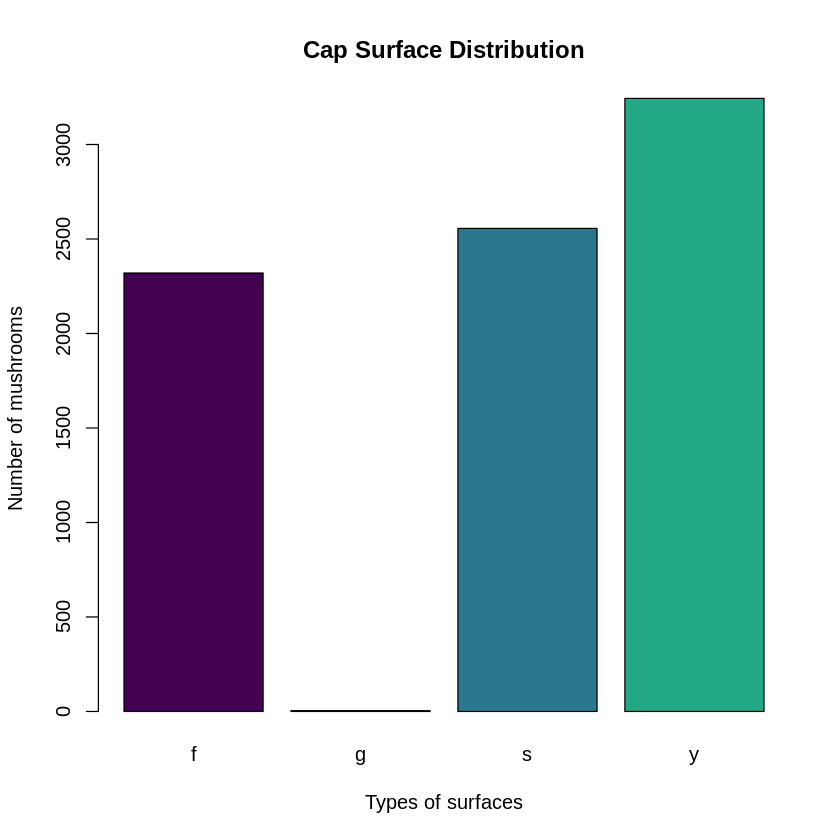

In [79]:
capsurface = table(df$cap.surface)
barplot(capsurface, xlab="Types of surfaces",ylab="Number of mushrooms",col=viridis(6), main="Cap Surface Distribution")

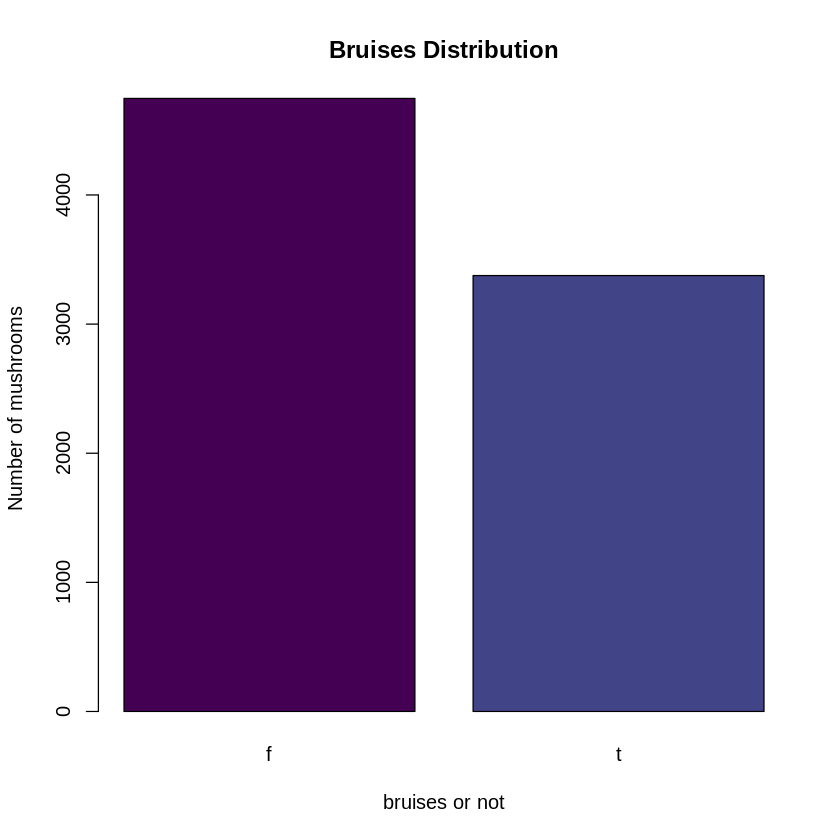

In [80]:
bruises = table(df$bruises)
barplot(bruises, xlab="bruises or not",ylab="Number of mushrooms",col=viridis(6), main="Bruises Distribution")

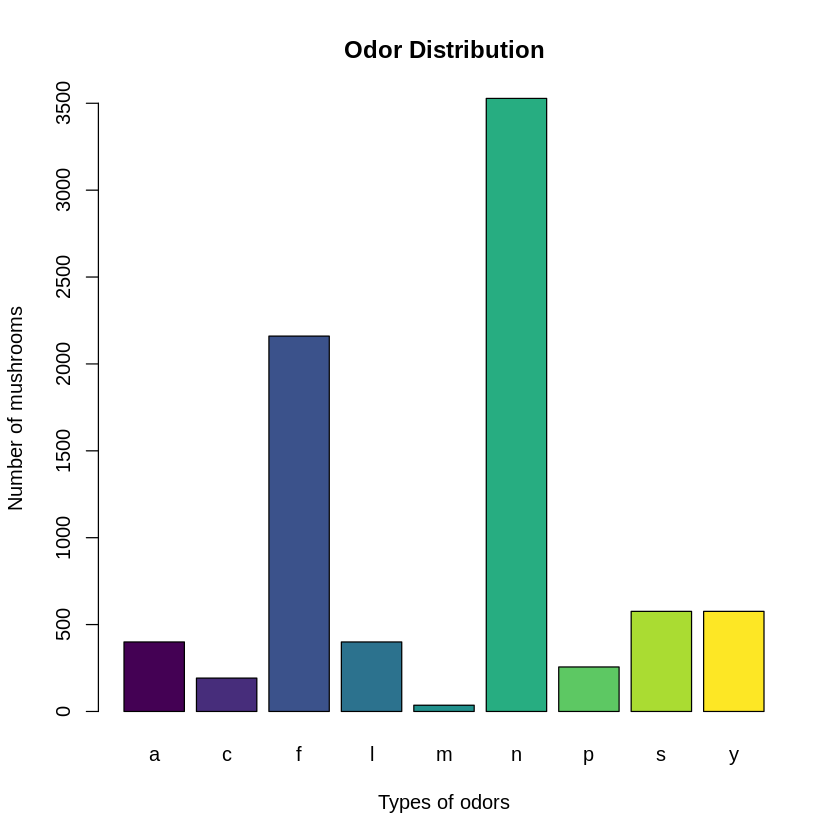

In [81]:
odor = table(df$odor)
barplot(odor, xlab="Types of odors",ylab="Number of mushrooms",col=viridis(9), main="Odor Distribution")

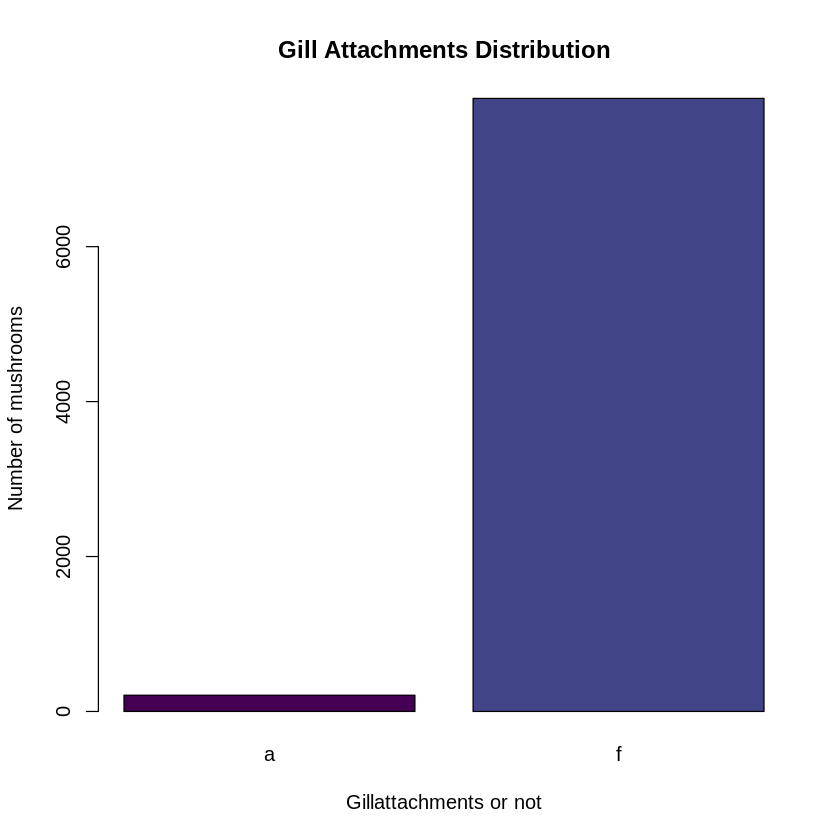

In [82]:
gillattachment = table(df$gill.attachment)
barplot(gillattachment, xlab="Gillattachments or not",ylab="Number of mushrooms",col=viridis(6), main="Gill Attachments Distribution")

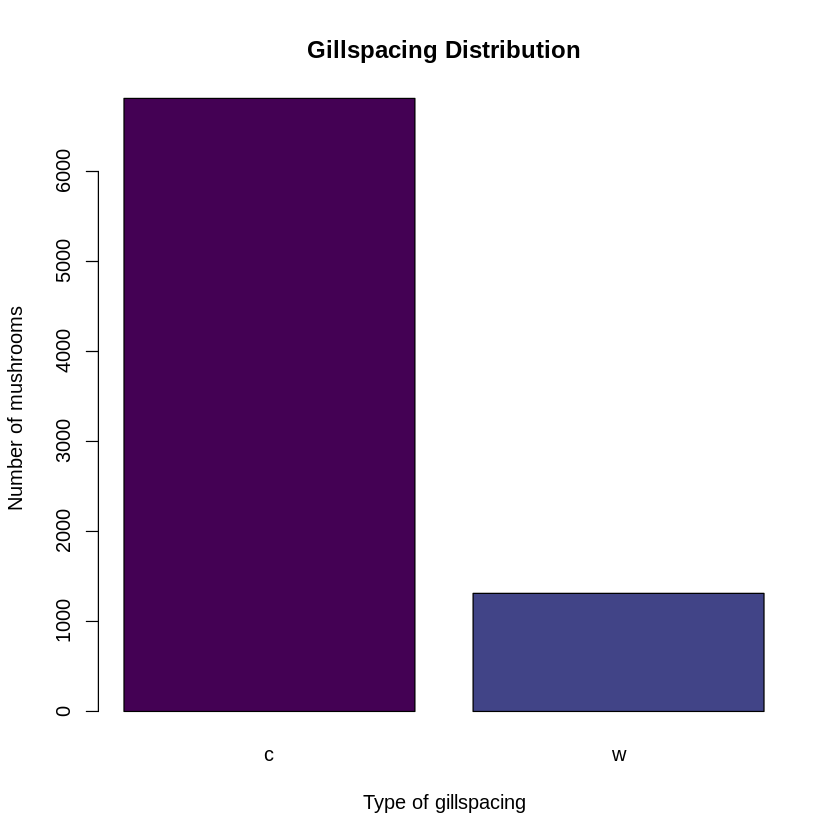

In [83]:
gillspacing = table(df$gill.spacing)
barplot(gillspacing, xlab="Type of gillspacing",ylab="Number of mushrooms",col=viridis(6), main="Gillspacing Distribution")

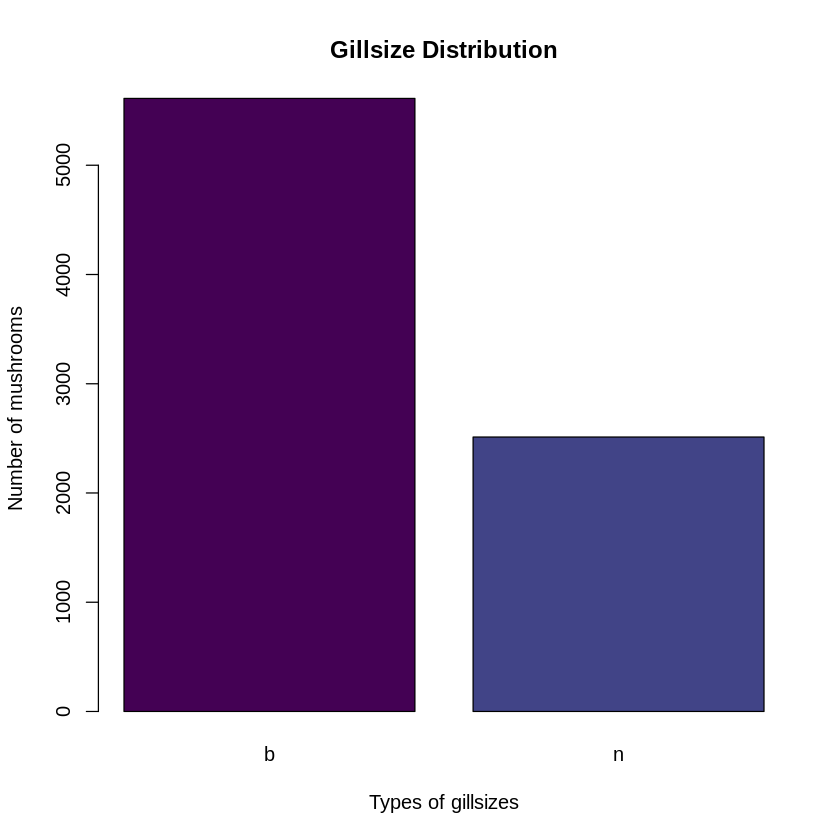

In [84]:
gillsize = table(df$gill.size)
barplot(gillsize, xlab="Types of gillsizes",ylab="Number of mushrooms",col=viridis(6), main="Gillsize Distribution")

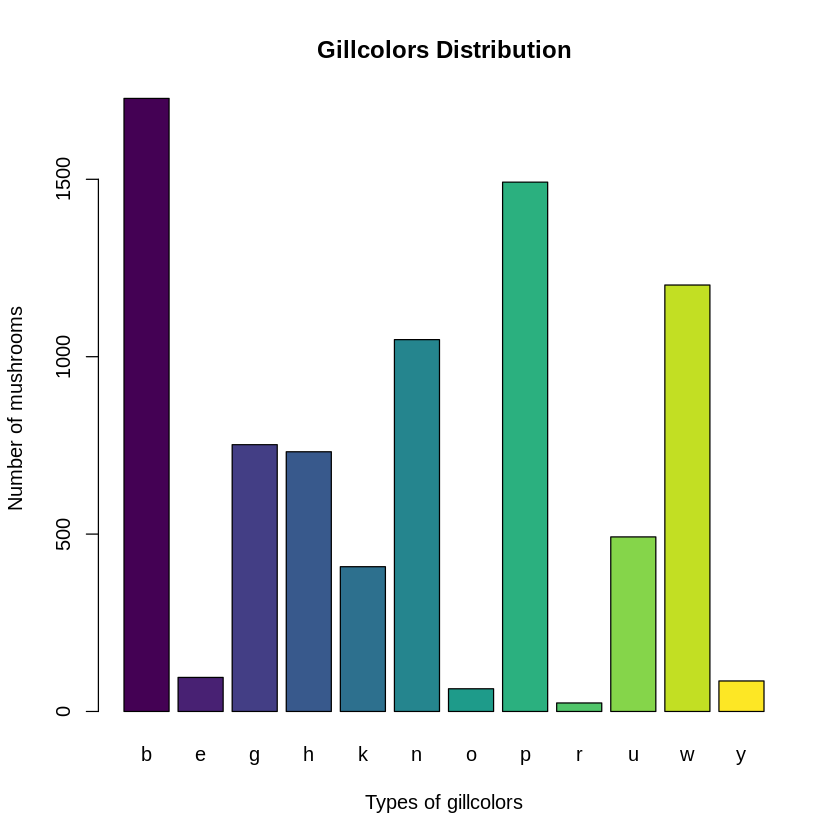

In [85]:
gillcolor = table(df$gill.color)
barplot(gillcolor, xlab="Types of gillcolors",ylab="Number of mushrooms",col=viridis(12), main="Gillcolors Distribution")

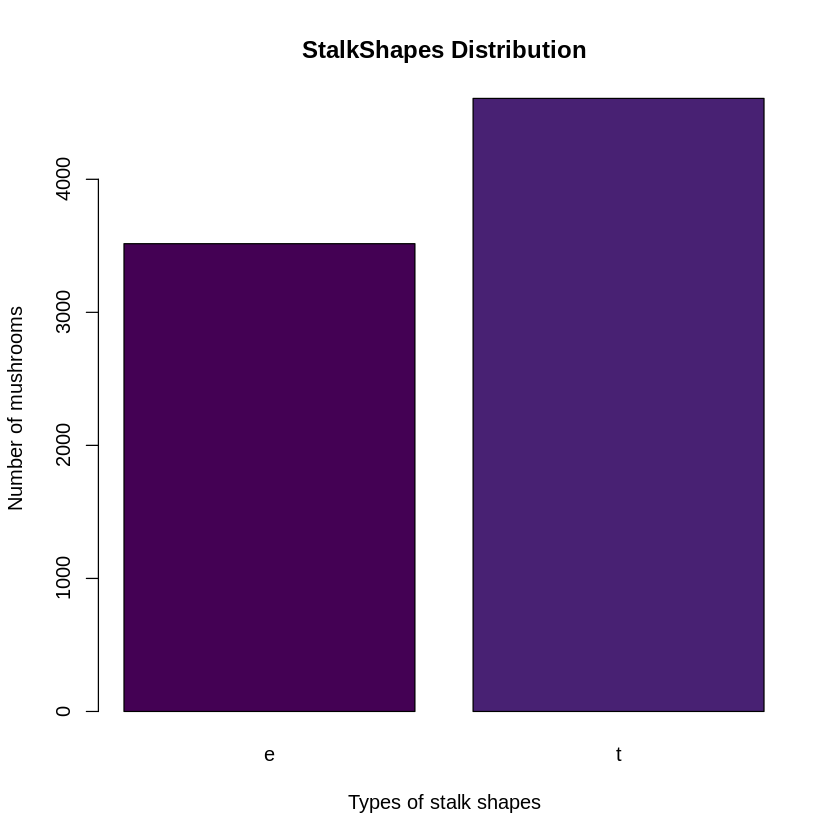

In [86]:
stalkshape = table(df$stalk.shape)
barplot(stalkshape, xlab="Types of stalk shapes",ylab="Number of mushrooms",col=viridis(12), main="StalkShapes Distribution")

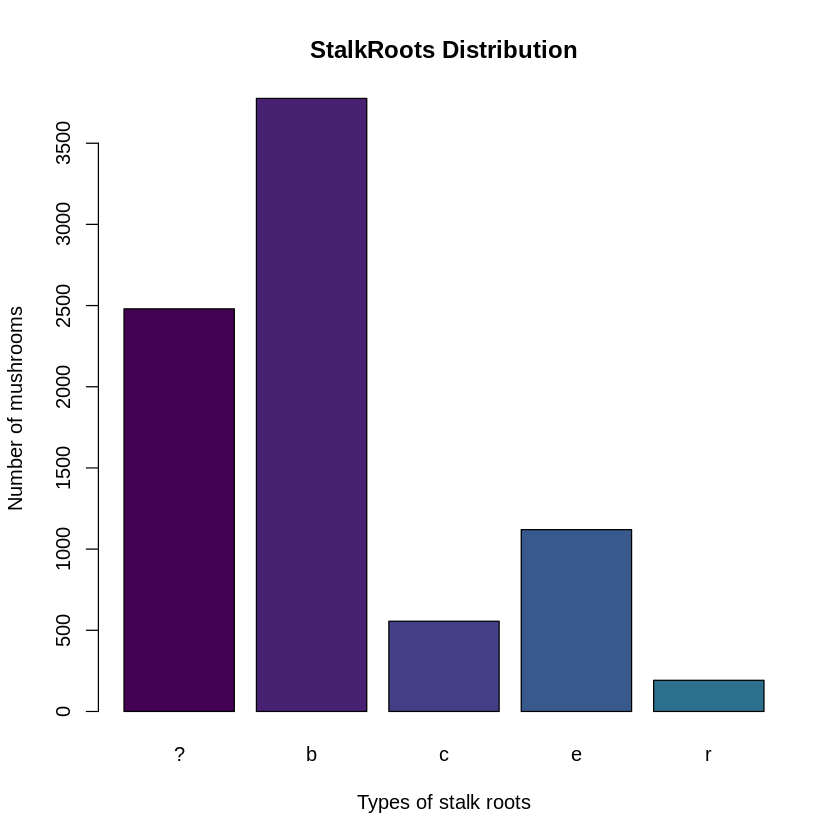

In [87]:
stalkroot = table(df$stalk.root)
barplot(stalkroot, xlab="Types of stalk roots",ylab="Number of mushrooms",col=viridis(12), main="StalkRoots Distribution")

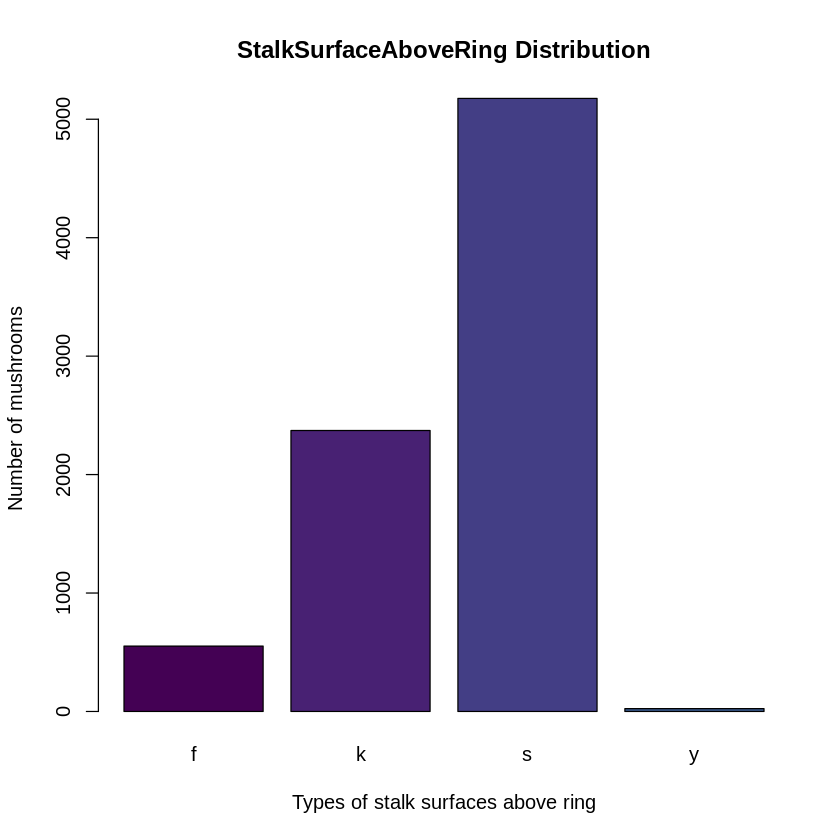

In [88]:
stalksurfaceabovering = table(df$stalk.surface.above.ring)
barplot(stalksurfaceabovering, xlab="Types of stalk surfaces above ring",ylab="Number of mushrooms",col=viridis(12), main="StalkSurfaceAboveRing Distribution")

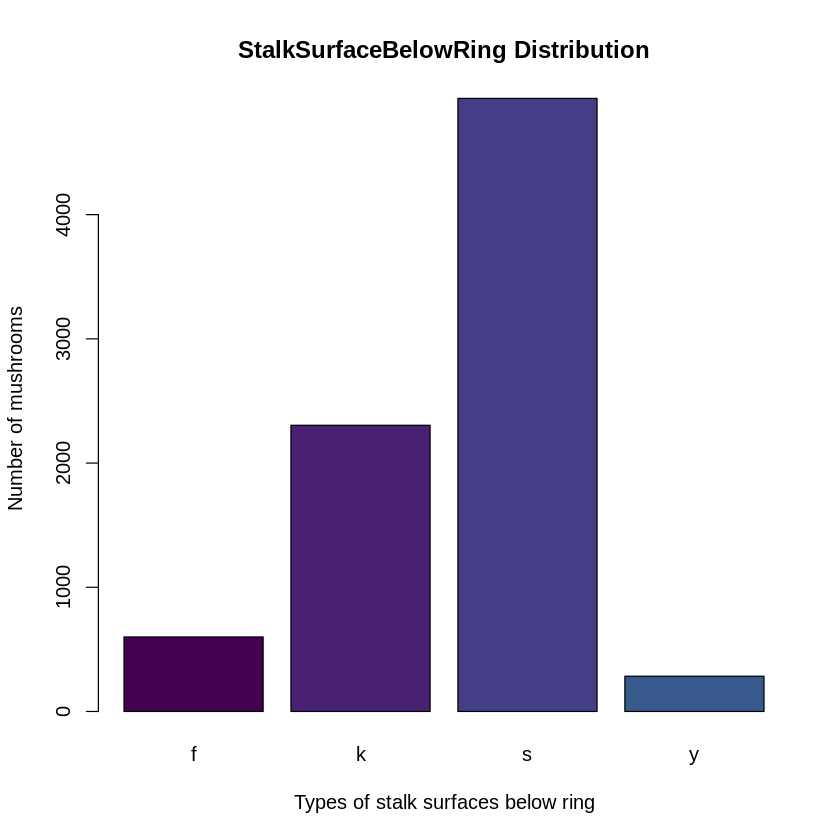

In [89]:
stalksurfacebelowring = table(df$stalk.surface.below.ring)
barplot(stalksurfacebelowring, xlab="Types of stalk surfaces below ring",ylab="Number of mushrooms",col=viridis(12), main="StalkSurfaceBelowRing Distribution")

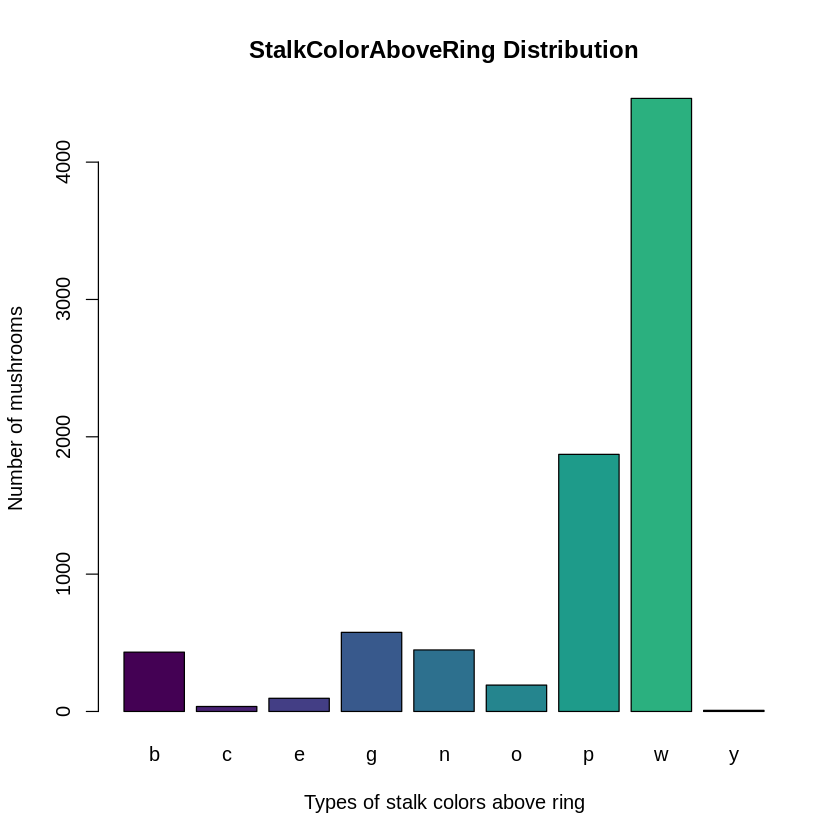

In [90]:
stalkcolorabovering = table(df$stalk.color.above.ring)
barplot(stalkcolorabovering, xlab="Types of stalk colors above ring",ylab="Number of mushrooms",col=viridis(12), main="StalkColorAboveRing Distribution")

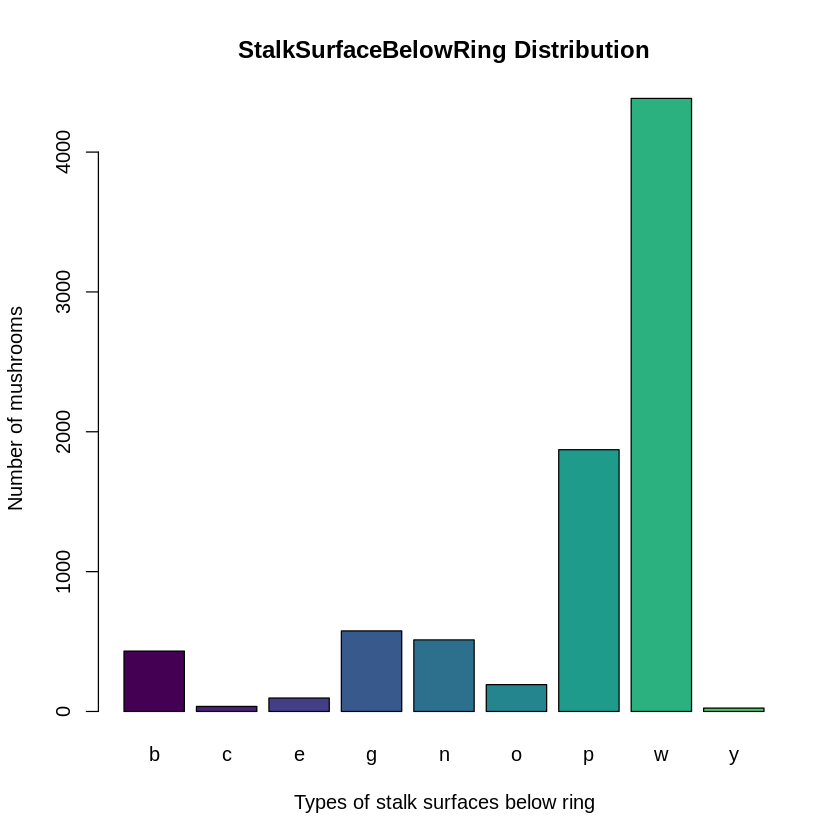

In [91]:
stalkcolorbelowring = table(df$stalk.color.below.ring)
barplot(stalkcolorbelowring, xlab="Types of stalk surfaces below ring",ylab="Number of mushrooms",col=viridis(12), main="StalkSurfaceBelowRing Distribution")

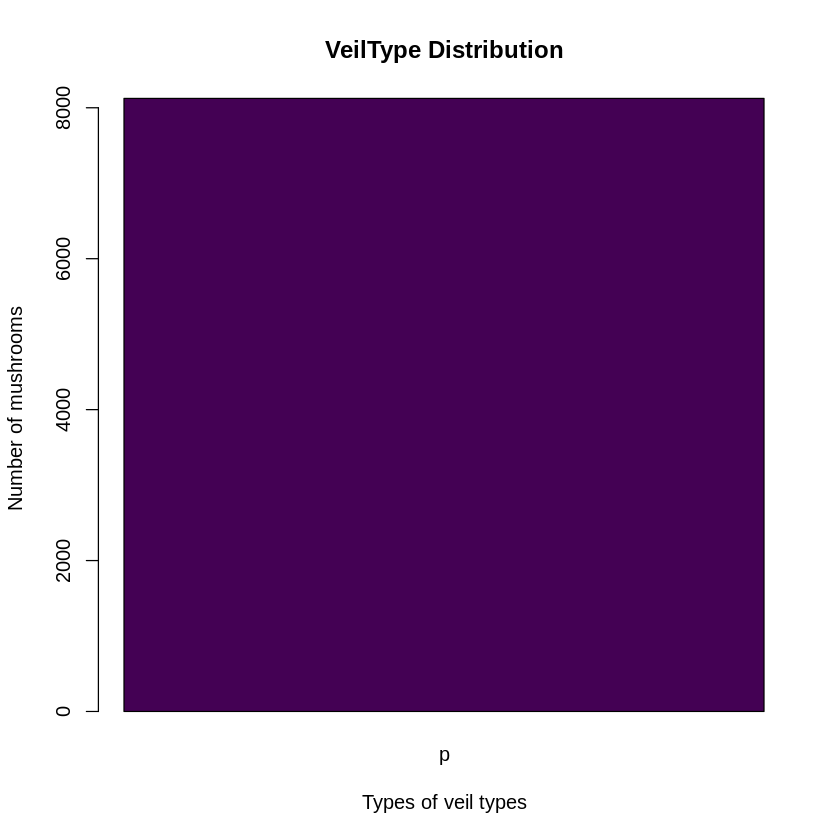

In [92]:
veiltype = table(df$veil.type)
barplot(veiltype, xlab="Types of veil types",ylab="Number of mushrooms",col=viridis(12), main="VeilType Distribution")

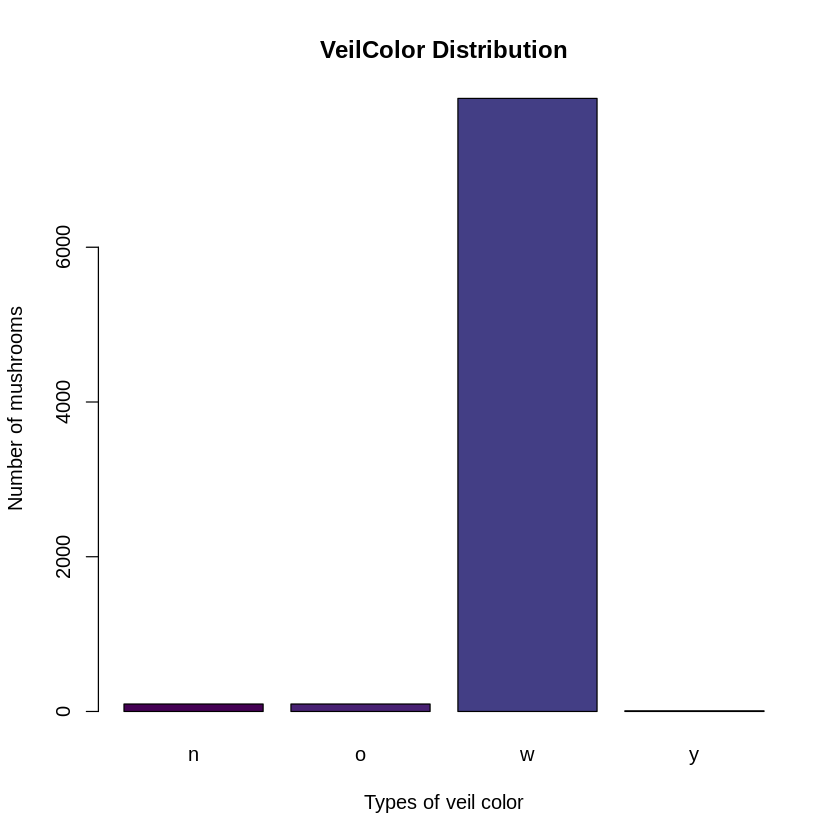

In [93]:
veilcolor = table(df$veil.color)
barplot(veilcolor, xlab="Types of veil color",ylab="Number of mushrooms",col=viridis(12), main="VeilColor Distribution")

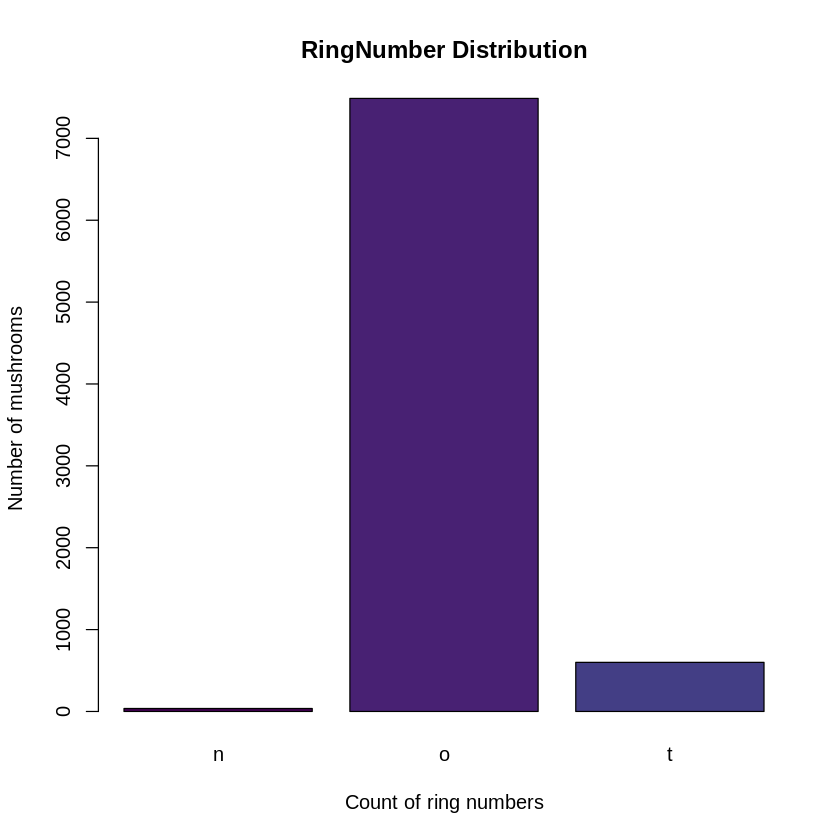

In [94]:
ringnumber = table(df$ring.number)
barplot(ringnumber, xlab="Count of ring numbers",ylab="Number of mushrooms",col=viridis(12), main="RingNumber Distribution")

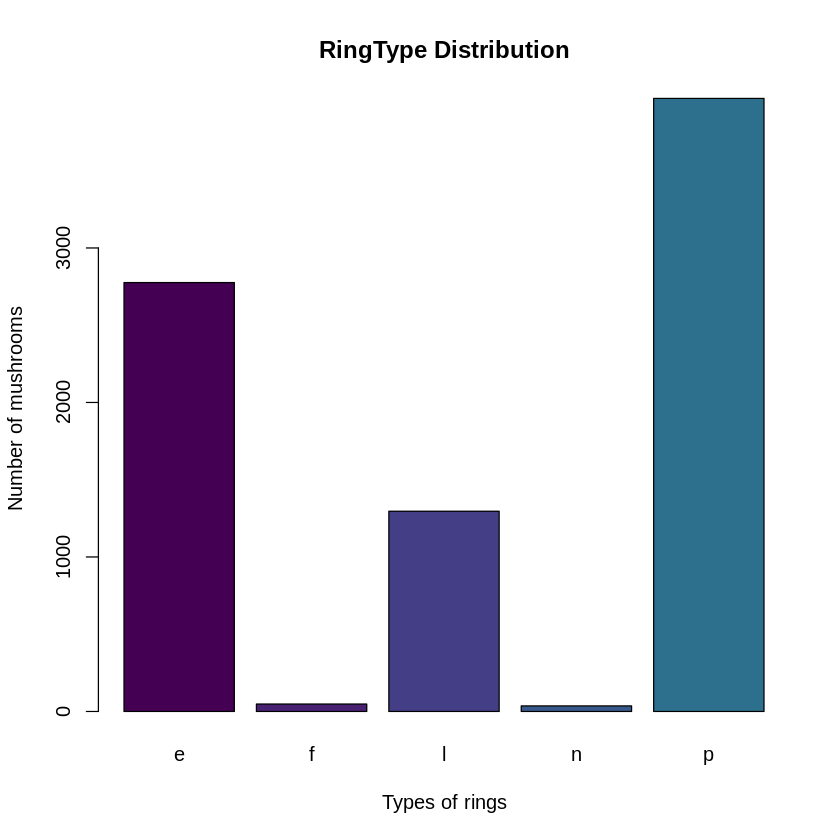

In [95]:
ringtype = table(df$ring.type)
barplot(ringtype, xlab="Types of rings",ylab="Number of mushrooms",col=viridis(12), main="RingType Distribution")

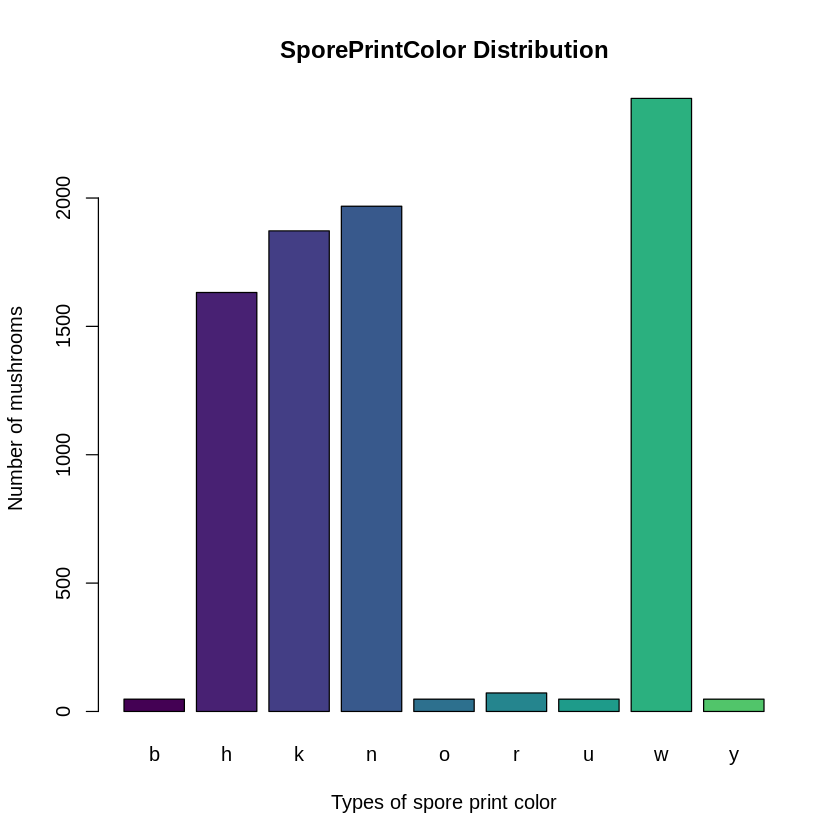

In [96]:
sporeprintcolor = table(df$spore.print.color)
barplot(sporeprintcolor, xlab="Types of spore print color",ylab="Number of mushrooms",col=viridis(12), main="SporePrintColor Distribution")

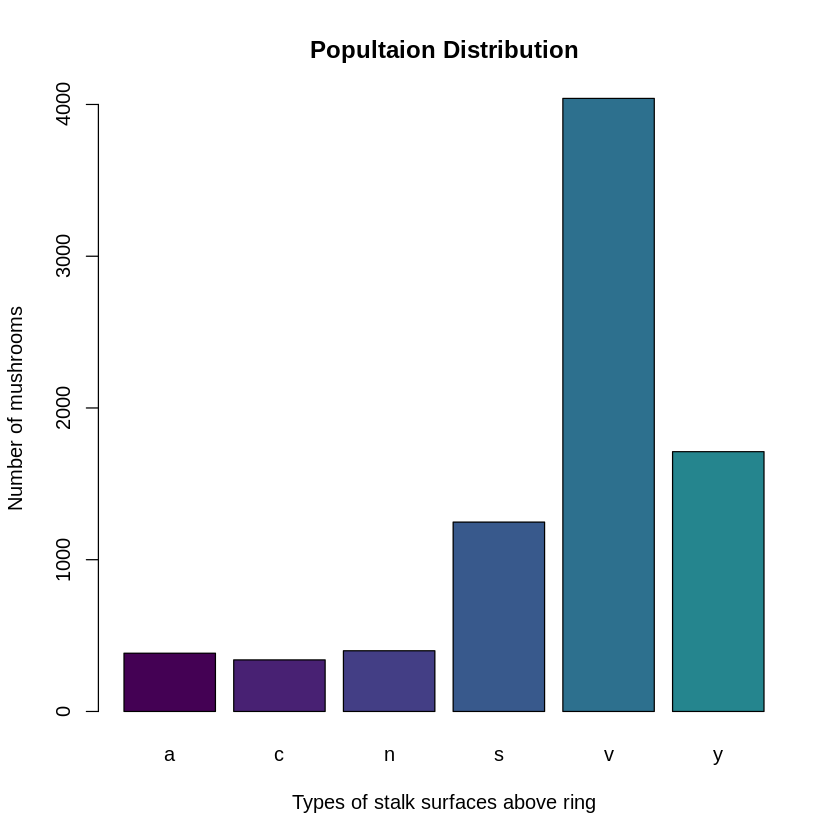

In [97]:
population = table(df$population)
barplot(population, xlab="Types of stalk surfaces above ring",ylab="Number of mushrooms",col=viridis(12), main="Popultaion Distribution")

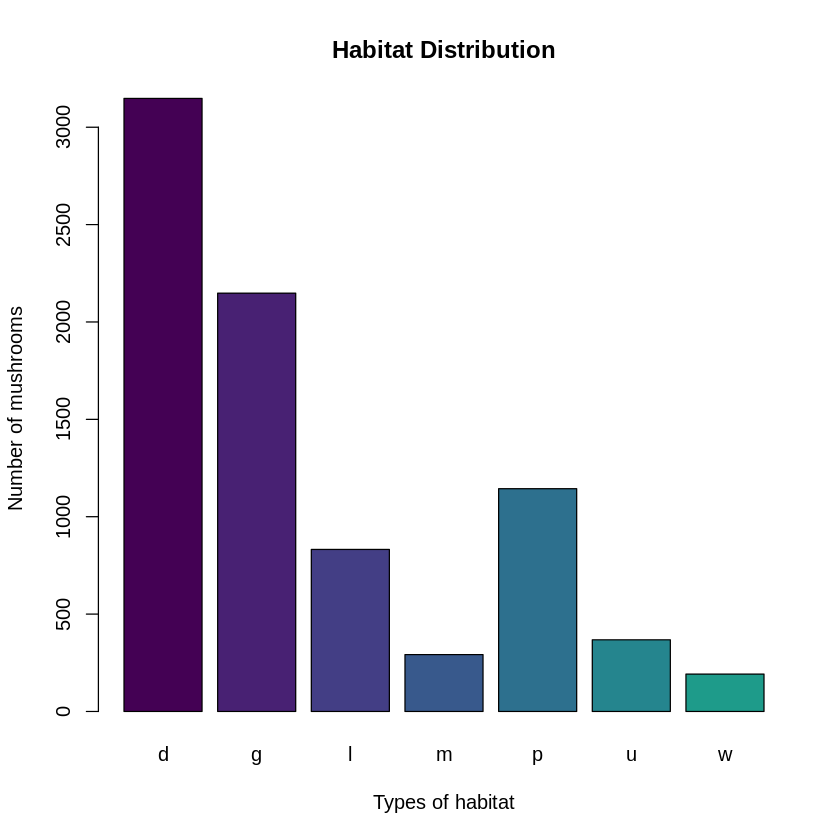

In [98]:
habitat = table(df$habitat)
barplot(habitat, xlab="Types of habitat",ylab="Number of mushrooms",col=viridis(12), main="Habitat Distribution")

In [46]:
# Features with extreme differences in it's values that I will be not be using are - Gill Attachment(since this has 2 values only), 
# Gill Spacing(since it has 2 values only), Veil Color (only 1 value is in majority)
# Also features with only 1 value do not make any difference to the classification. It's value is consistent and hence is to be removed. - Veil Type 
# Features which are not that evenly distributed but can be normalised and I will be using for classification - Cap shape, Cap color, 
# Cap Surface, Bruises, Odor, Gill size, Gill Color, Stalk Shapes, Stalk Roots, Stalk Surface Above Ring, Stalk Surface Below Ring,
# Stalk Color Above Ring, Stalk Color Below Ring, Ring Number, Ring Type, Spore Print Color, Population, Habitat (18 features)
# Approved - 18, Removed - 4

In [99]:
# Now let's remove the attirbutes that have constant values - Such attributes are also called Constant Predictors
const_pred = unlist(lapply(2:12,FUN=function(x){
    TBL=table(df$class[[x]])
    ifelse(length(names(TBL))<2,-1*x,x)
}))
print(ifelse(any(const_pred<0), "Constant Predictors Exist","No Constant Predictors"))

[1] "No Constant Predictors"


In [100]:
#There are no constant predictors.

df2<-df

In [49]:
# I remove the features which are not even and cannot be normalised. I created a subset of the data frame.

In [101]:
df <- subset( df, select = -c(gill.attachment,gill.spacing))
df <- subset( df, select = -c(veil.type,veil.color))
glimpse(df)

Rows: 8,124
Columns: 19
$ class                    <fct> p, e, e, p, e, e, e, e, p, e, e, e, e, p, e, …
$ cap.shape                <chr> "x", "x", "b", "x", "x", "x", "b", "b", "x", …
$ cap.surface              <chr> "s", "s", "s", "y", "s", "y", "s", "y", "y", …
$ cap.color                <chr> "n", "y", "w", "w", "g", "y", "w", "w", "w", …
$ bruises                  <chr> "t", "t", "t", "t", "f", "t", "t", "t", "t", …
$ odor                     <chr> "p", "a", "l", "p", "n", "a", "a", "l", "p", …
$ gill.size                <chr> "n", "b", "b", "n", "b", "b", "b", "b", "n", …
$ gill.color               <chr> "k", "k", "n", "n", "k", "n", "g", "n", "p", …
$ stalk.shape              <chr> "e", "e", "e", "e", "t", "e", "e", "e", "e", …
$ stalk.root               <chr> "e", "c", "c", "e", "e", "c", "c", "c", "e", …
$ stalk.surface.above.ring <chr> "s", "s", "s", "s", "s", "s", "s", "s", "s", …
$ stalk.surface.below.ring <chr> "s", "s", "s", "s", "s", "s", "s", "s", "s", …
$ stalk.color.ab

In [102]:
# Now we change the data type char to factor as mathematical calculation cannot be done on the same.

In [104]:
df$cap.shape = as.numeric(as.factor(df$cap.shape))

df$cap.surface= as.numeric(as.factor(df$cap.surface))

df$cap.color=as.numeric(as.factor(df$cap.color))

df$bruises=as.numeric(as.factor(df$bruises))

df$odor=as.factor=as.numeric(as.factor(df$odor))

#df$gill.size=as.numeric(as.factor(df$gill.size))

df$stalk.shape=as.numeric(as.factor(df$stalk.shape))

df$stalk.root=as.numeric(as.factor(df$stalk.root))

df$stalk.surface.above.ring=as.numeric(as.factor(df$stalk.surface.above.ring))

df$stalk.surface.below.ring=as.numeric(as.factor(df$stalk.surface.below.ring))

df$stalk.color.above.ring=as.numeric(as.factor(df$stalk.color.above.ring))

df$stalk.color.below.ring=as.numeric(as.factor(df$stalk.color.below.ring))

#df$veil.color=as.numeric(as.factor(df$veil.color))

df$ring.number=as.numeric(as.factor(df$ring.number))

df$ring.type=as.numeric(as.factor(df$ring.type))

df$spore.print.color=as.numeric(as.factor(df$spore.print.color))

df$population=as.numeric(as.factor(df$population))

df$habitat=as.numeric(as.factor(df$habitat))

df$class=as.numeric(df$class)

In [110]:
df$gill.size=as.numeric(as.factor(df$gill.size))
df$gill.color=as.numeric(as.factor(df$gill.color))

In [111]:
glimpse(df)

Rows: 8,124
Columns: 19
$ class                    <dbl> 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, …
$ cap.shape                <dbl> 6, 6, 1, 6, 6, 6, 1, 1, 6, 1, 6, 6, 1, 6, 6, …
$ cap.surface              <dbl> 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 3, 4, 1, …
$ cap.color                <dbl> 5, 10, 9, 9, 4, 10, 9, 9, 9, 10, 10, 10, 10, …
$ bruises                  <dbl> 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, …
$ odor                     <dbl> 7, 1, 4, 7, 6, 1, 1, 4, 7, 1, 4, 1, 1, 7, 6, …
$ gill.size                <dbl> 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, …
$ gill.color               <dbl> 5, 5, 6, 6, 5, 6, 3, 6, 8, 3, 3, 6, 11, 5, 6,…
$ stalk.shape              <dbl> 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, …
$ stalk.root               <dbl> 4, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, …
$ stalk.surface.above.ring <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ stalk.surface.below.ring <dbl> 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, …
$ stalk.color.ab

In [106]:
# Now we will make a Correlation matrix for the independent variables using this we will be able to 
# identify the attributes which are highly correlated which will make our classification biased.
# This bias will lower the accuracy level our Classification so we will remove those columns.

In [112]:
df2<-df

head(df)

,class,cap.shape,cap.surface,cap.color,bruises,odor,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,ring.number,ring.type,spore.print.color,population,habitat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,6,3,5,2,7,2,5,1,4,3,3,8,8,2,5,3,4,6
2,1,6,3,10,2,1,1,5,1,3,3,3,8,8,2,5,4,3,2
3,1,1,3,9,2,4,1,6,1,3,3,3,8,8,2,5,4,3,4
4,2,6,4,9,2,7,2,6,1,4,3,3,8,8,2,5,3,4,6
5,1,6,3,4,1,6,1,5,2,4,3,3,8,8,2,1,4,1,2
6,1,6,4,10,2,1,1,6,1,3,3,3,8,8,2,5,3,3,2


In [113]:
std_dev_data = round(apply(df[,-1],2,sd),4)
std_dev_data

cap.shape              cap.surface                cap.color 
                  1.6043                   1.2299                   2.5458 
                 bruises                     odor                gill.size 
                  0.4928                   2.1037                   0.4622 
              gill.color              stalk.shape               stalk.root 
                  3.5404                   0.4955                   1.0611 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                  0.6215                   0.6760                   1.9017 
  stalk.color.below.ring              ring.number                ring.type 
                  1.9073                   0.2711                   1.8017 
       spore.print.color               population                  habitat 
                  2.3827                   1.2521                   1.7200

In [114]:
mean_data = round(apply(df[,-1],2,mean),4)
mean_data

cap.shape              cap.surface                cap.color 
                  4.3481                   2.8277                   5.5047 
                 bruises                     odor                gill.size 
                  1.4156                   5.1448                   1.3092 
              gill.color              stalk.shape               stalk.root 
                  5.8107                   1.5672                   2.1098 
stalk.surface.above.ring stalk.surface.below.ring   stalk.color.above.ring 
                  2.5751                   2.6036                   6.8163 
  stalk.color.below.ring              ring.number                ring.type 
                  6.7947                   2.0694                   3.2920 
       spore.print.color               population                  habitat 
                  4.5968                   4.6440                   2.5086

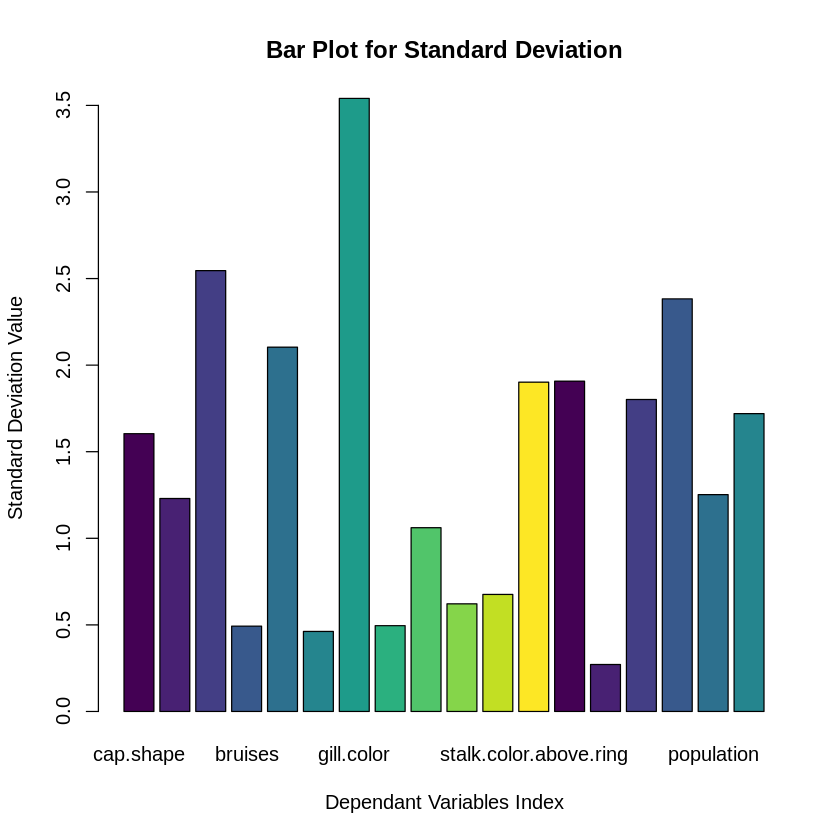

In [115]:
barplot(std_dev_data,col=viridis(12), xlab = "Dependant Variables Index", ylab = "Standard Deviation Value", main="Bar Plot for Standard Deviation")

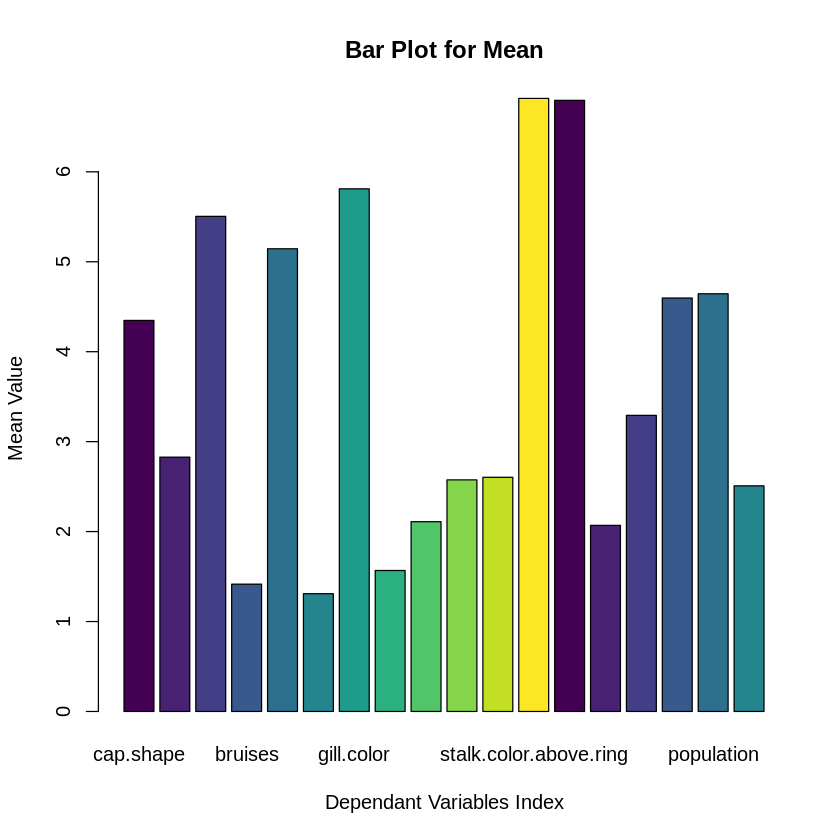

In [116]:
barplot(mean_data,col=viridis(12), xlab = "Dependant Variables Index", ylab = "Mean Value", main= "Bar Plot for Mean")

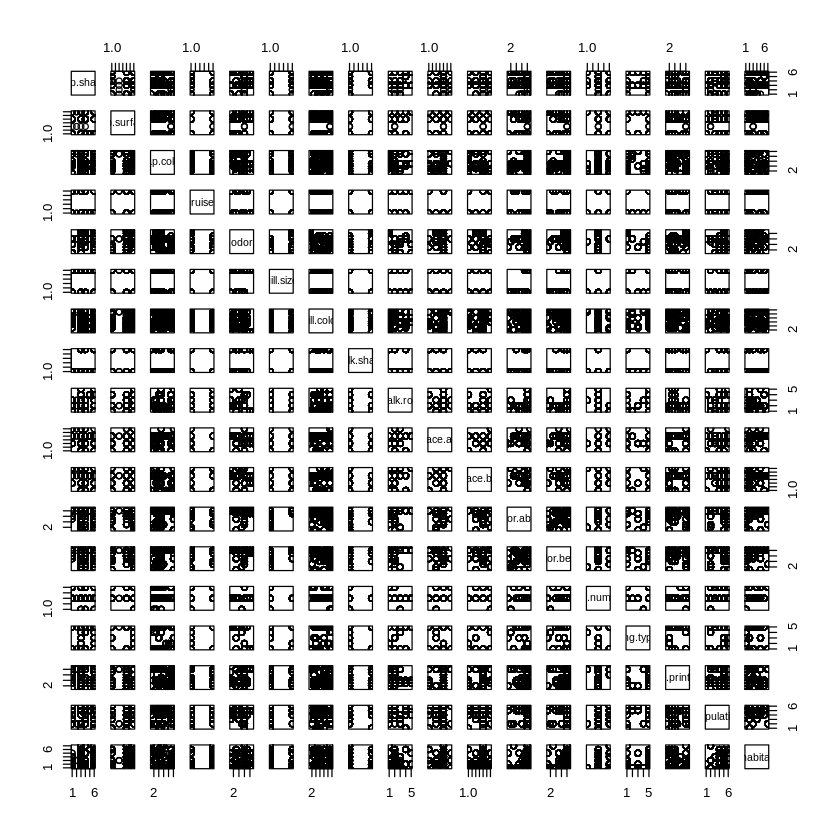

In [117]:
pairs(df[,2:19])

In [118]:
#Let's compute the correlation values
cordata = cor(df[,2:19])

In [119]:
cordata

,cap.shape,cap.surface,cap.color,bruises,odor,gill.size,gill.color,stalk.shape,stalk.root,stalk.surface.above.ring,stalk.surface.below.ring,stalk.color.above.ring,stalk.color.below.ring,ring.number,ring.type,spore.print.color,population,habitat
cap.shape,1.000000000,-0.05045366,-0.0482028382,-0.0353741309,-0.02193525,0.05405029,-0.006038763,0.06379422,0.030191055,-0.03041717,-0.03259110,-0.031659294,-0.030389818,-0.106533800,-0.02545659,-0.07341554,0.06341315,-0.042220908
cap.surface,-0.050453658,1.00000000,-0.0194017126,0.0702284217,0.04523330,0.20809984,-0.161017496,-0.01412263,-0.126244506,0.08909034,0.10796451,0.066050280,0.068884899,-0.026147132,-0.10640695,0.23036405,0.02155513,0.163886648
cap.color,-0.048202838,-0.01940171,1.0000000000,-0.0007644492,-0.38712095,-0.16946428,0.084659083,-0.45649603,0.321273863,-0.06083706,-0.04771021,0.002364215,0.008057408,-0.005822482,0.16251270,-0.29352270,-0.14476959,0.033925237
bruises,-0.035374131,0.07022842,-0.0007644492,1.0000000000,-0.06182521,-0.36959578,0.527119547,0.09936422,0.244188240,0.46082387,0.45898283,0.083537963,0.092873649,0.056787568,0.69297292,-0.28500828,0.08813723,-0.075095396
odor,-0.021935250,0.04523330,-0.3871209455,-0.0618252075,1.00000000,0.31049504,-0.129213181,0.45976567,-0.205214912,0.11861721,0.06182042,0.174532111,0.169406507,0.111905278,-0.28138728,0.46905525,-0.04362269,-0.026610441
gill.size,0.054050293,0.20809984,-0.1694642848,-0.3695957842,0.31049504,1.00000000,-0.516736145,0.21457621,-0.344345305,0.05631011,0.01089390,0.296548218,0.278707620,-0.171361947,-0.46087209,0.62299073,0.14768187,0.161417901
gill.color,-0.006038763,-0.16101750,0.0846590826,0.5271195470,-0.12921318,-0.51673614,1.000000000,-0.17569910,0.315080006,0.22428671,0.25722385,-0.058299424,-0.074781019,0.096053786,0.62939804,-0.41613548,-0.03408987,-0.202972318
stalk.shape,0.063794216,-0.01412263,-0.4564960350,0.0993642221,0.45976567,0.21457621,-0.175699105,1.00000000,-0.163422345,0.01519325,-0.03439874,0.223439082,0.235793800,-0.293221090,-0.29144442,0.25883063,0.08738310,-0.269216014
stalk.root,0.030191055,-0.12624451,0.3212738629,0.2441882401,-0.20521491,-0.34434531,0.315080006,-0.16342234,1.000000000,-0.02706517,0.08745436,0.157140182,0.159805397,-0.247357209,0.21015536,-0.53699558,-0.30674740,-0.007668475
stalk.surface.above.ring,-0.030417170,0.08909034,-0.0608370647,0.4608238700,0.11861721,0.05631011,0.224286711,0.01519325,-0.027065168,1.00000000,0.43716441,0.132708030,0.142834610,0.107903593,0.39009102,0.10076378,0.07960400,-0.058076402


In [120]:
print(ifelse(any(abs(cordata[cordata!=1])>0.5), "Correlated Predictors Exist"," No Correlated Predictors"))

[1] "Correlated Predictors Exist"


In [121]:
cor_index = which(abs(cordata)>0.5 & abs(cordata)!=1, arr.ind = T)
cor_index

,row,col
gill.color,7,4
ring.type,15,4
gill.color,7,6
spore.print.color,16,6
bruises,4,7
gill.size,6,7
ring.type,15,7
spore.print.color,16,9
bruises,4,15
gill.color,7,15


In [122]:
cor_index=cor_index[!duplicated(cbind(pmax(cor_index[,1], cor_index[,2]), pmin(cor_index[,1], cor_index[,2]))),]

In [123]:
cor_index

,row,col
gill.color,7,4
ring.type,15,4
gill.color,7,6
spore.print.color,16,6
ring.type,15,7
spore.print.color,16,9


In [124]:
tbl_cor_index=table(cor_index[,1])
cor_index_num=length(tbl_cor_index) # Number of correlated predictors
print(paste("Number of correlated predictors =",cor_index_num))
cor_index
names(tbl_cor_index)

[1] "Number of correlated predictors = 3"


,row,col
gill.color,7,4
ring.type,15,4
gill.color,7,6
spore.print.color,16,6
ring.type,15,7
spore.print.color,16,9


[1] "7"  "15" "16"

In [125]:
# From the above calculation, we know that Ring Type, Sopre print color and Spore color below ring are correlated and hence, we shall use only use one of them
# as a feature moving forward

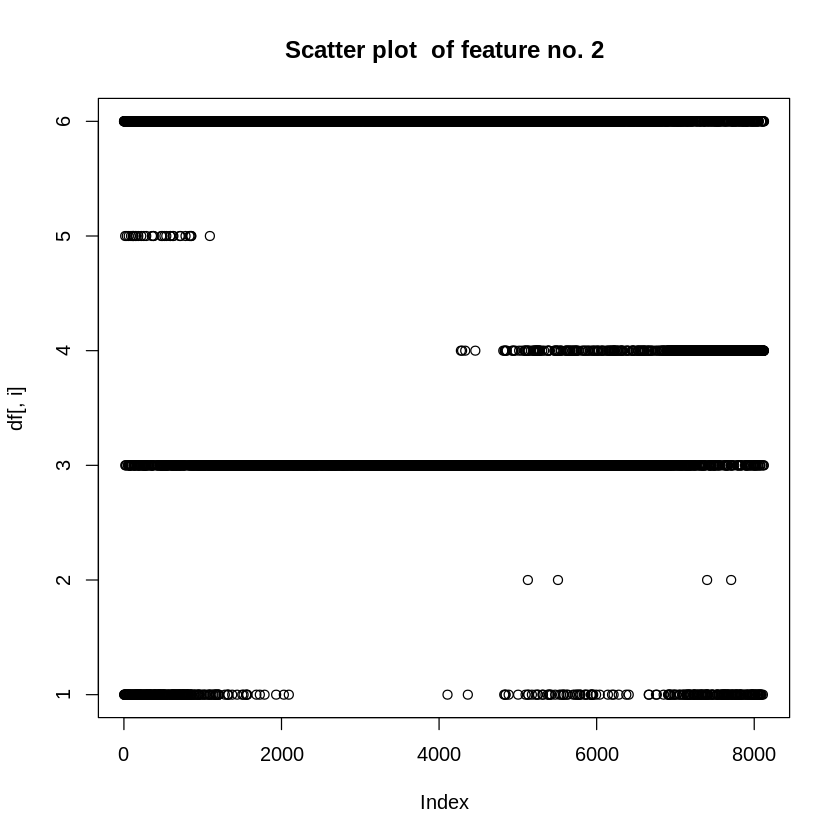

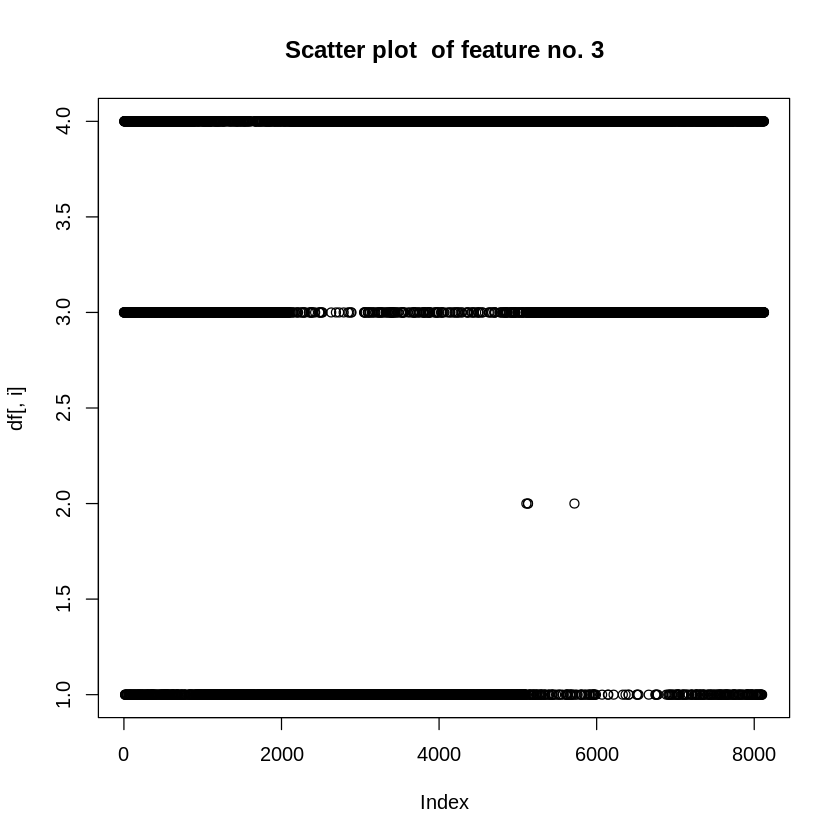

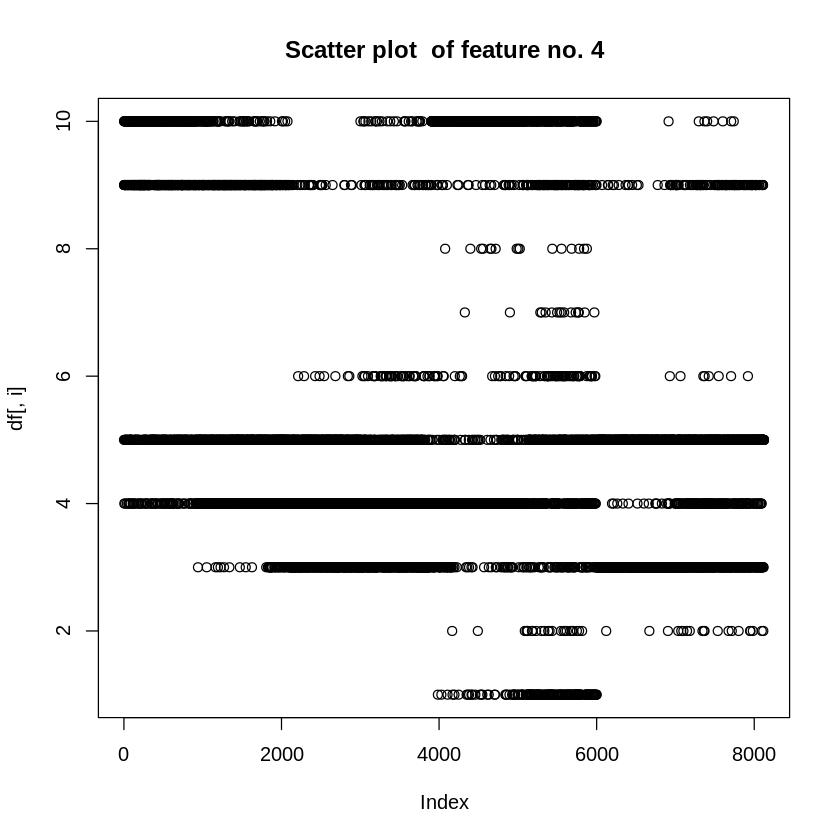

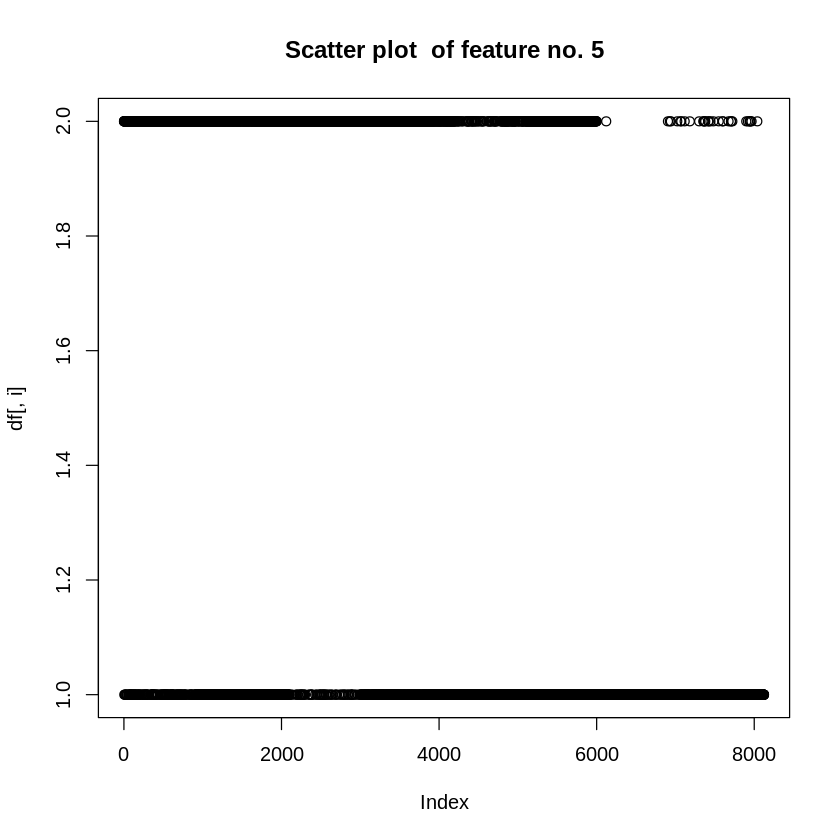

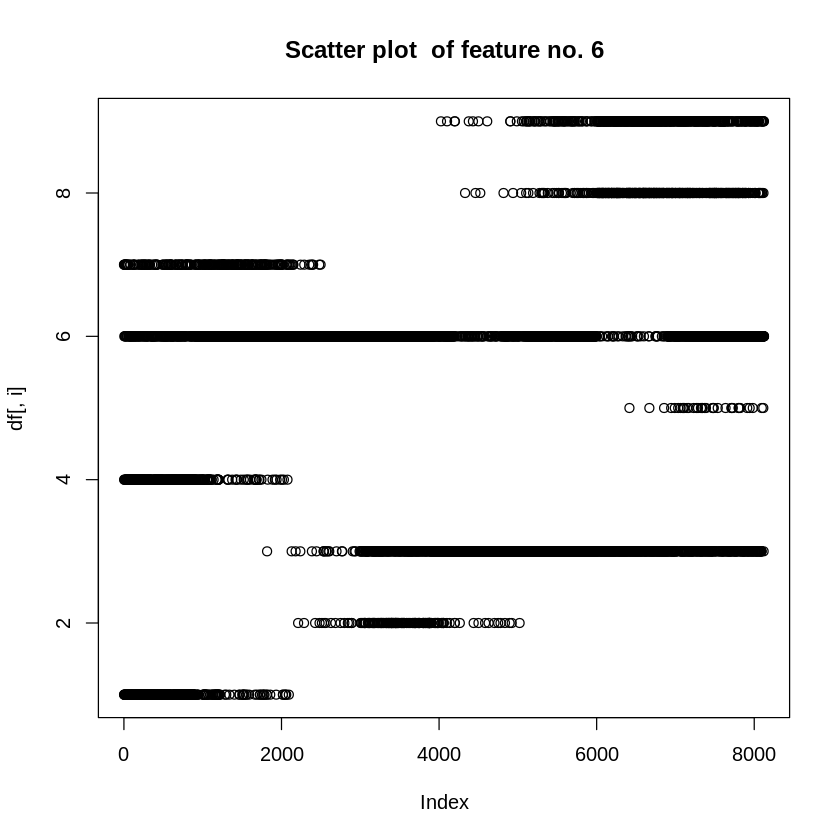

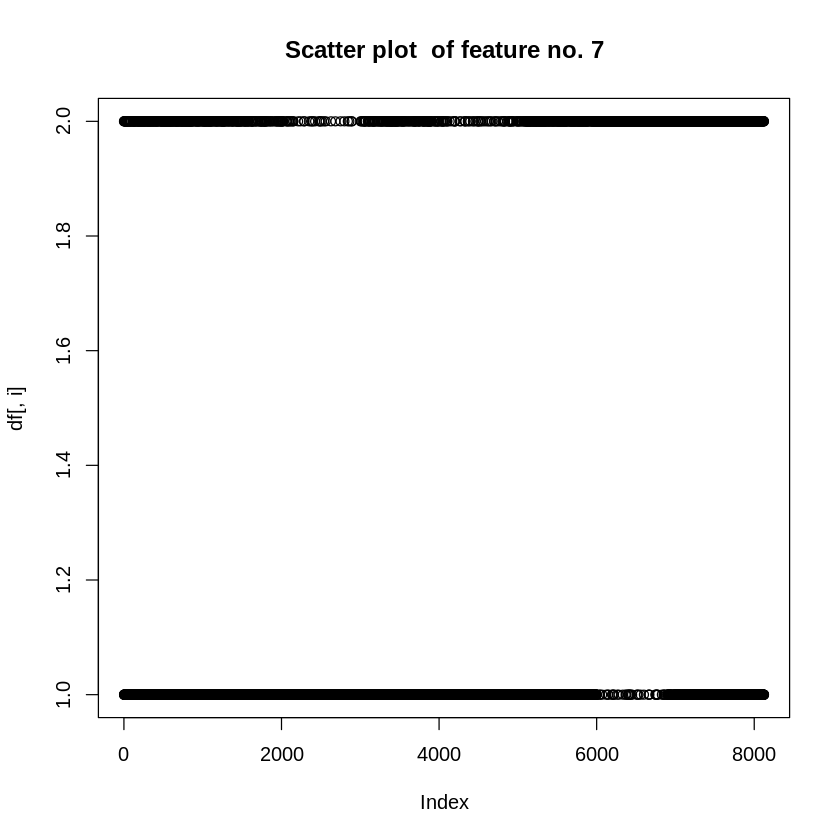

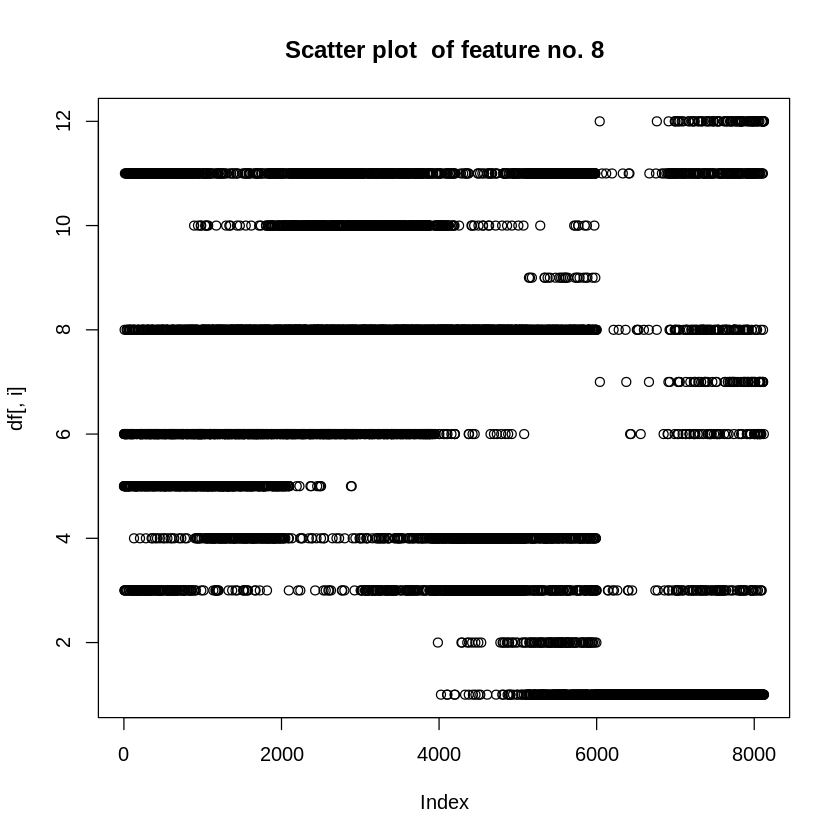

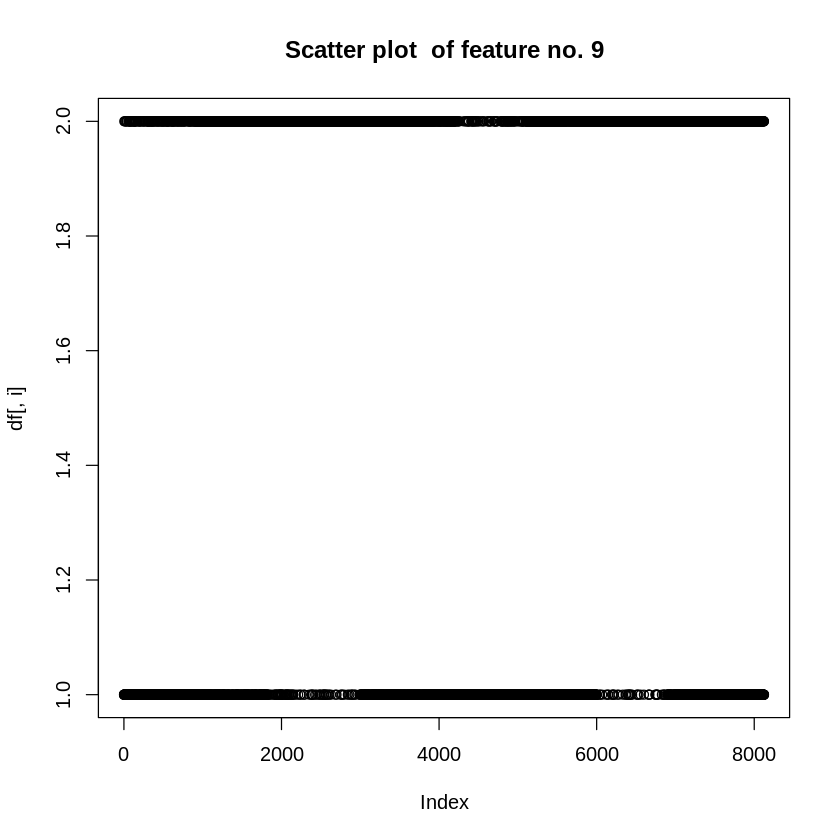

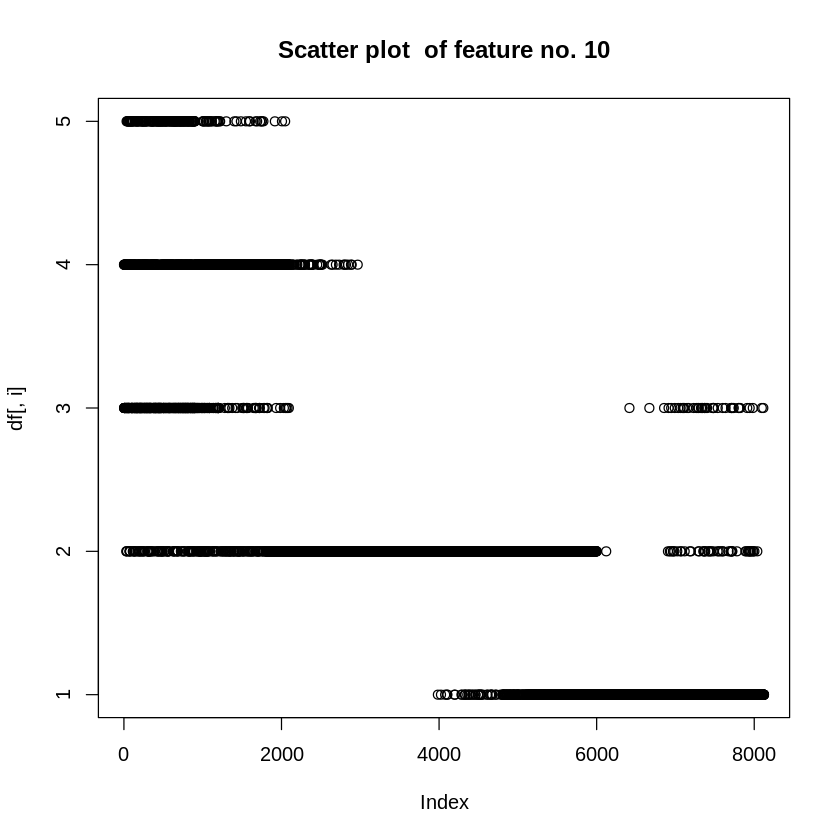

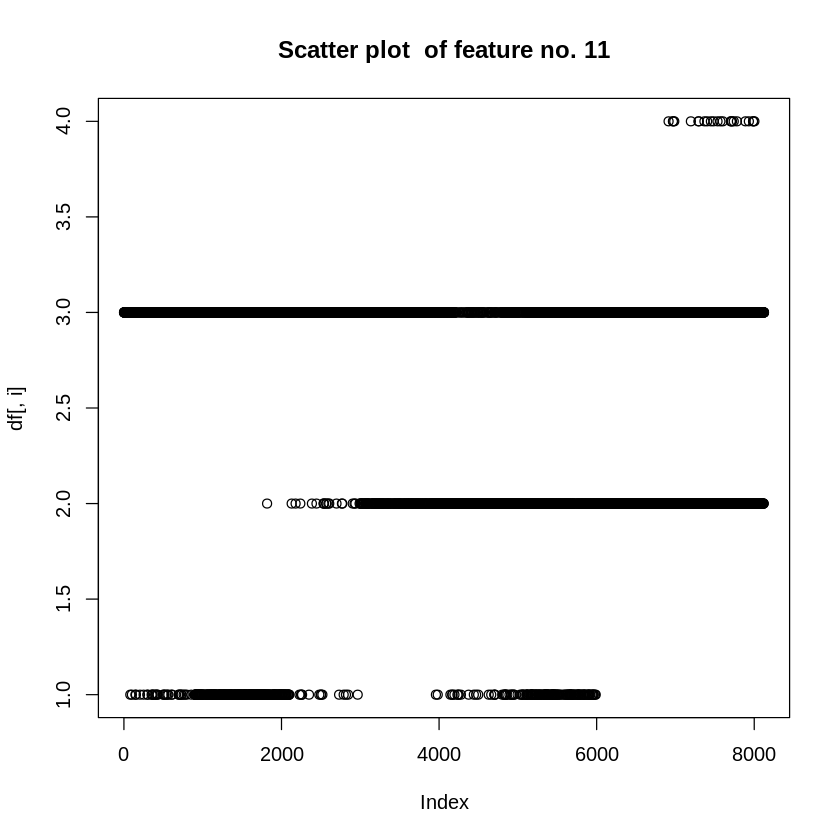

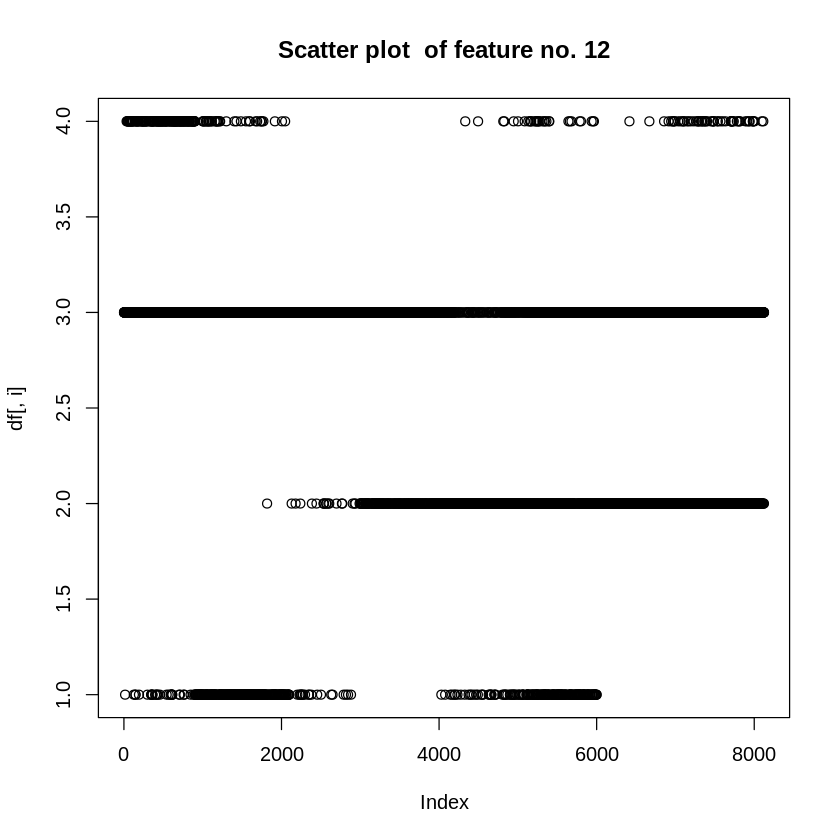

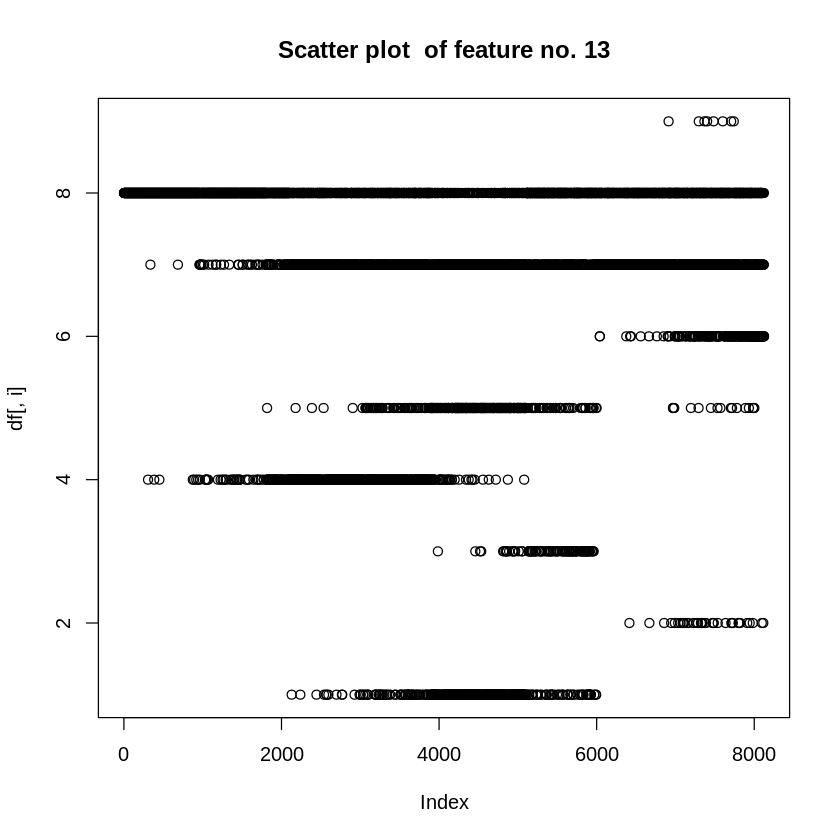

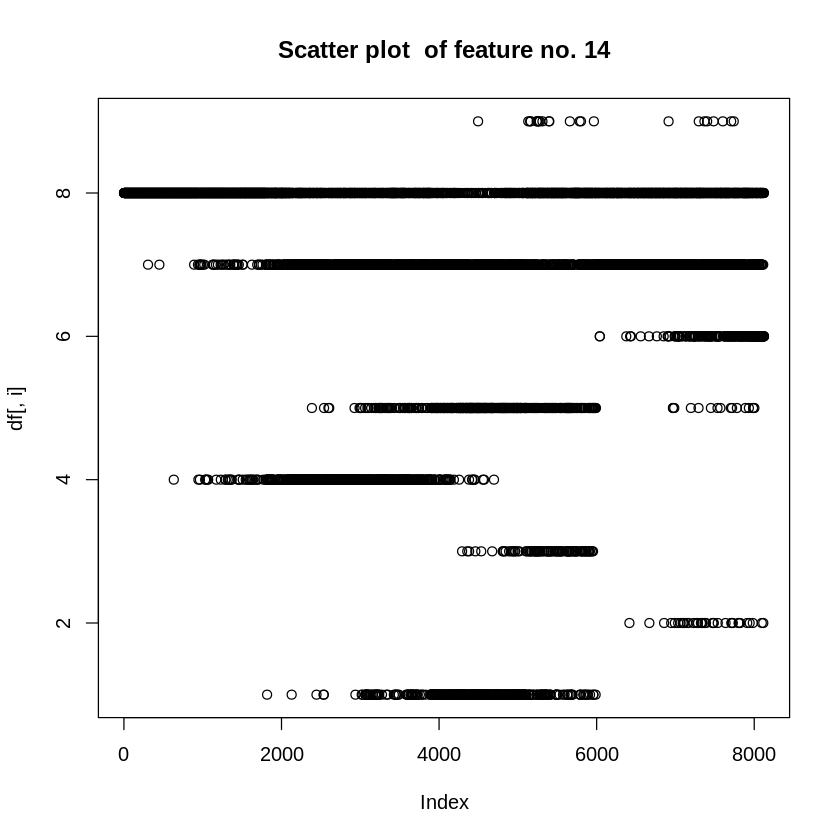

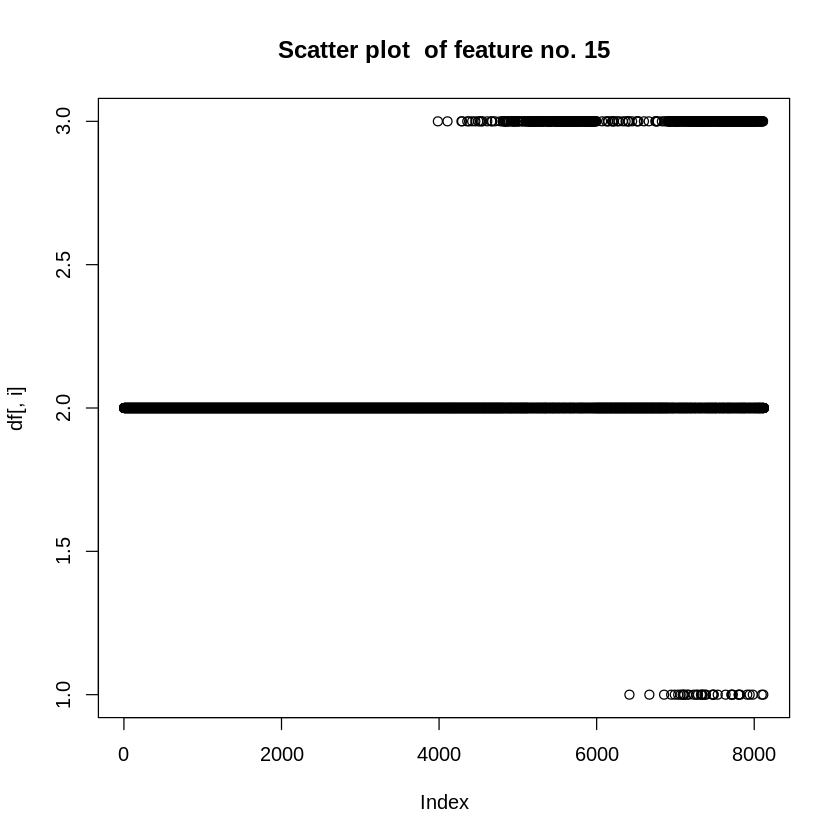

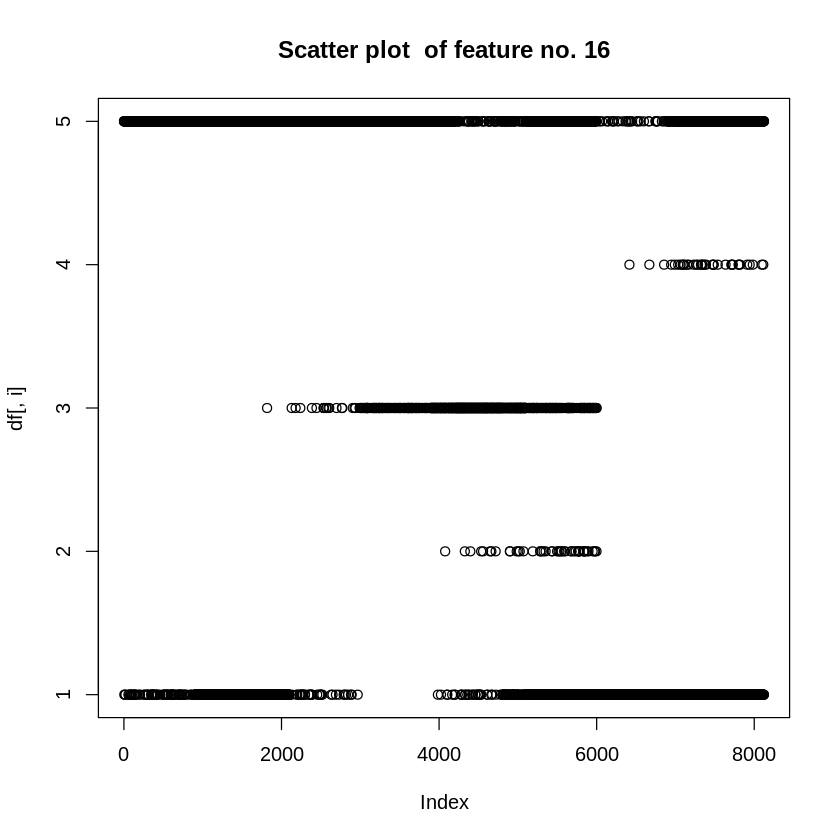

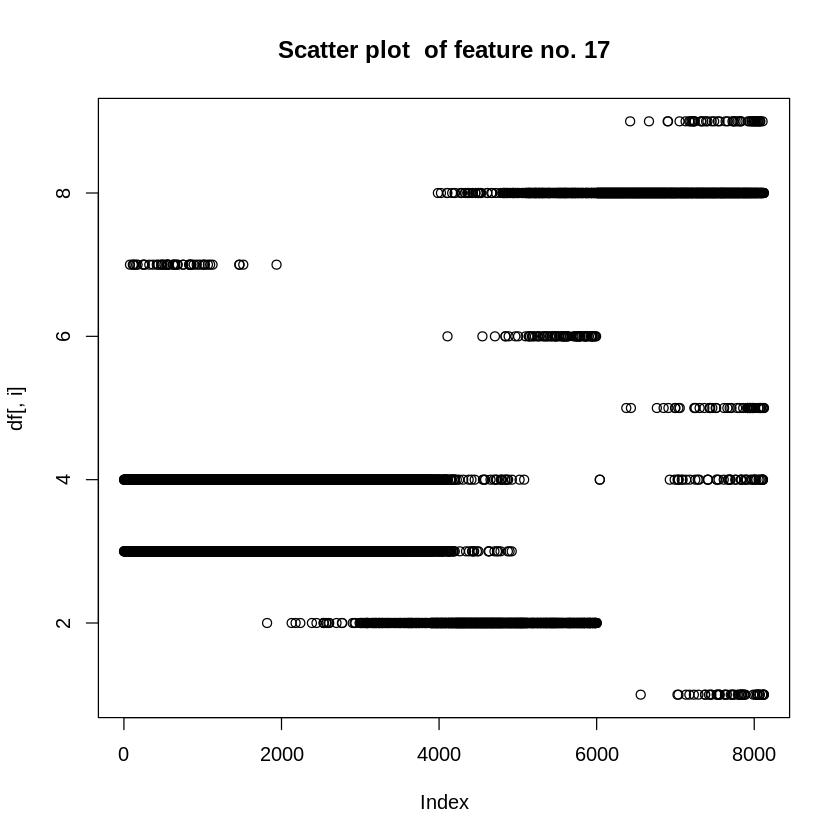

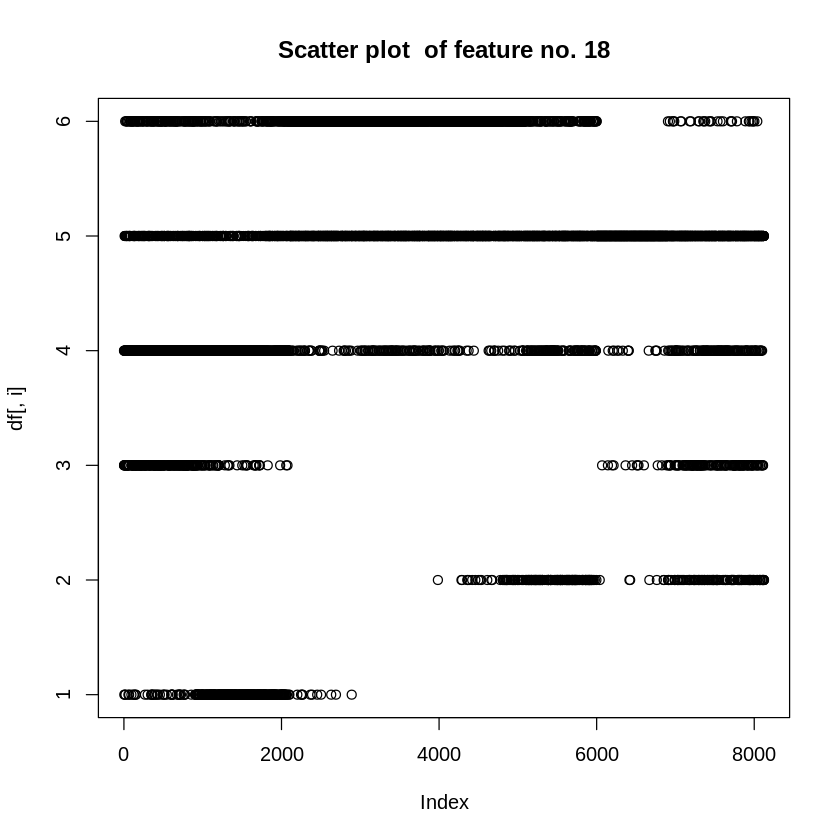

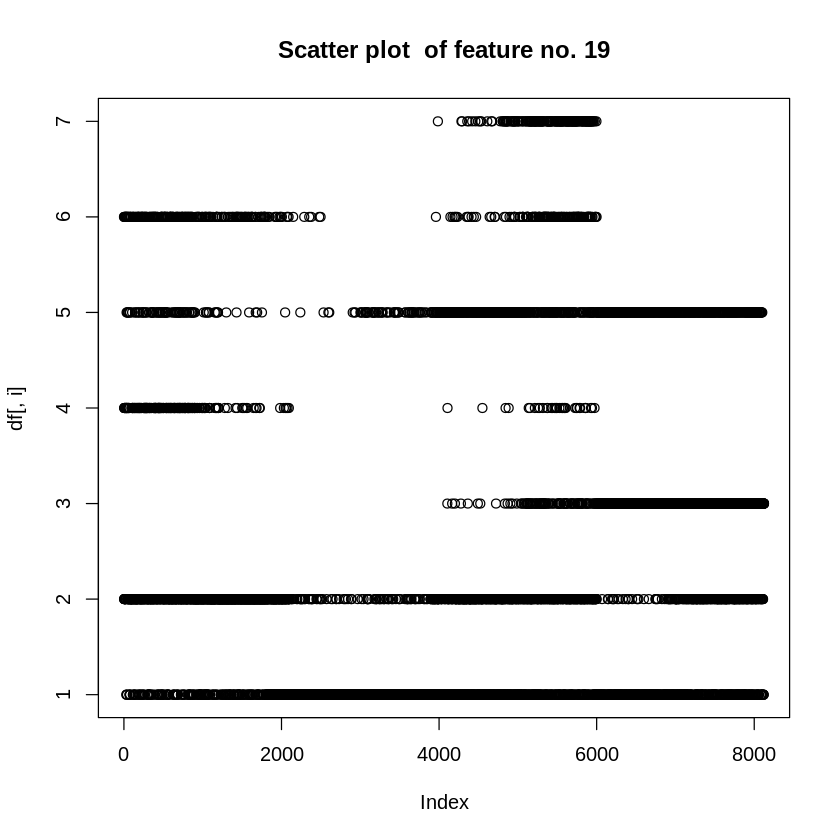

In [126]:
# Scatter plot - 18 features
for(i in 2:19) {plot(df[,i],main=paste("Scatter plot  of feature no.", i))}

In [127]:
summary(df)

     class         cap.shape      cap.surface      cap.color     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   : 1.000  
 1st Qu.:1.000   1st Qu.:3.000   1st Qu.:1.000   1st Qu.: 4.000  
 Median :1.000   Median :4.000   Median :3.000   Median : 5.000  
 Mean   :1.482   Mean   :4.348   Mean   :2.828   Mean   : 5.505  
 3rd Qu.:2.000   3rd Qu.:6.000   3rd Qu.:4.000   3rd Qu.: 9.000  
 Max.   :2.000   Max.   :6.000   Max.   :4.000   Max.   :10.000  
    bruises           odor         gill.size       gill.color    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   : 1.000  
 1st Qu.:1.000   1st Qu.:3.000   1st Qu.:1.000   1st Qu.: 3.000  
 Median :1.000   Median :6.000   Median :1.000   Median : 6.000  
 Mean   :1.416   Mean   :5.145   Mean   :1.309   Mean   : 5.811  
 3rd Qu.:2.000   3rd Qu.:6.000   3rd Qu.:2.000   3rd Qu.: 8.000  
 Max.   :2.000   Max.   :9.000   Max.   :2.000   Max.   :12.000  
  stalk.shape      stalk.root   stalk.surface.above.ring
 Min.   :1.000   Mi

**Recommendation**

Earlier we had removed four variables because of extreme differences in thier values - Gill attachment, Gill Spacing, Veil Color and Veil Type. Looking at the correlated predictors which give us a result that 3 features are highly related I will be choosing only one of those features and will remove the rest two. The two features that I will be removing are Spore Print Color and Stalk Color Below Ring.

This leaves us with 16 attributes - Cap shape, Cap color, Cap Surface, Bruises, Odor, Gill size, Gill Color, Stalk Shapes, Stalk Roots, Stalk Surface Above Ring, Stalk Surface Below Ring, Stalk Color Above Ring, Ring Number, Ring Type, Population, Habitat.